<a href="https://colab.research.google.com/github/fajrinovi/credit-risk-prediction-using-python/blob/main/credit_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Prediction

## Business Understanding


When a lending company receives a loan application, they have to evaluate the applicant's profile to determine whether to approve or reject their application, with each decision having either a good or bad risk outcome. 
* Rejecting the application of an applicant who is likely to repay the loan would result in a business loss for the company, 
* Approving the application of an applicant who is unlikely to repay the loan would lead to a financial loss. 

The dataset contains information about past loans of applicants and whether they were categorized as a good or bad risk. The risks are classified into two types: 
* good risk, which includes applicants who have fully paid, current, or in grace period loan status, 
* bad risk, which includes applicants with late, default, or charged off loan status. 

Applicants with a good risk status are more likely to have their loan application approved, while those with a bad risk status are unlikely to be approved in the future.

## Business Objective

* To prevent the risk of default, the objective is to detect patterns that suggest an applicant may not repay the loan or be classified as a bad risk. This information can be used to make decisions such as rejecting the loan application, reducing the loan amount, or lending at a higher interest rate. By identifying these patterns, the lending company can minimize potential losses and make informed decisions to improve profitability.
* Develop a machine learning model that accurately predicts the risk status of loan applicants.
* Minimize the risk of default and potential losses by identifying high-risk applicants and adjusting loan terms accordingly.
* Improve decision-making and increase profitability for the lending company.
* Streamline the loan approval process by automating the risk assessment, saving time and resources.

## Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read and load data into dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit risk prediction/loan_data_2007_2014.csv')
# check the data size
df.shape

<ipython-input-3-e2156a866972>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit risk prediction/loan_data_2007_2014.csv')


(466285, 75)

In [ ]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding

### Statistical Summary

#### Numerical Features

In [ ]:
number_features = df.select_dtypes(include=['int64', 'float64'])
print('The number of numerical features is {}'.format(number_features.shape[1]))

The number of numerical features is 53


In [ ]:
number_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


* `Unnamed: 0`, `id`, `member_id` are unique for each row. This features will be removed as because it is not needed for analysis.
* `policy_code` has only one unique value. This feature will be removed because no information can be obtained from the this feature.
There are 17 features that have missing value. This features will be dealt with in the data clansing section.

In [ ]:
# drop unnecessary features
df.drop(['Unnamed: 0', 'member_id', 'policy_code'], inplace=True, axis=1)

#### Categorical Features

In [ ]:
categorical_features = df.select_dtypes(include=['object'])
print('The number of categorical features is {}'.format(categorical_features.shape[1]))

The number of categorical features is 22


In [ ]:
categorical_features.describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


* The features `emp_title`, `url` ,`desc`,`title` , `zip_code`, and `addr_state` will be removed, because this features have many unique values.
* `application_type` has only one unique value. This feature will be removed because no information can be obtained from the this feature.

In [ ]:
# drop unnecessary features
df.drop(['emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'application_type'], inplace=True, axis=1)

In [ ]:
loan_status_unique = df['loan_status'].unique()
print(loan_status_unique)

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


### Data Types Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   funded_amnt                  466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   term                         466285 non-null  object 
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   sub_grade                    466285 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

`issue_d`, `earliest_cr_line`, `last_pymnt_d`, `next_pymnt_d`, and `last_credit_pull_d` will be converted to datetime format

In [ ]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [ ]:
# convert string to datetime
from datetime import datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: date_time(x))
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y') 
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'],format='%b-%y') 
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')
df[['earliest_cr_line', 'issue_d', 'next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d']].head()

,earliest_cr_line,issue_d,next_pymnt_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,NaT,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,NaT,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,NaT,2014-06-01,2016-01-01
3,1996-02-01,2011-12-01,NaT,2015-01-01,2015-01-01
4,1996-01-01,2011-12-01,2016-02-01,2016-01-01,2016-01-01


In [ ]:
print('Data type after converting:\n')
df.info()

Data type after converting:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           466285 non-null  int64         
 1   loan_amnt                    466285 non-null  int64         
 2   funded_amnt                  466285 non-null  int64         
 3   funded_amnt_inv              466285 non-null  float64       
 4   term                         466285 non-null  object        
 5   int_rate                     466285 non-null  float64       
 6   installment                  466285 non-null  float64       
 7   grade                        466285 non-null  object        
 8   sub_grade                    466285 non-null  object        
 9   emp_length                   445277 non-null  object        
 10  home_ownership               466285 non-null  object        
 1

## Data Preprocessing

### Create Target Feature

### Loan Status Description

* **Fully paid:** it means the applicant has repaid the entire amount of the loan either by the end of the loan term or earlier by making prepayments.
* **Current:** it means the applicant is making payments on time.
* **In grace period** is a set number of days after the due date during which payment can be made without penalty. The exact number of days varies by lending company. During this period, no late fees are charged, and failure to pay during this time does not typically result in the loan being canceled or marked as defaulted on the applicant's credit report.
* **Late**: it means the applicant failed to make a timely payment within the grace period. In this case, the grace period days will be counted as late days. Late payments can negatively impact the applicant's credit score, depending on the applicant's overall credit profile and how far behind they are on their payments. Late payments are further categorized by the number of days late, such as *16-30 days* or *31-120 days late*.
* **Default:** it means the lending company has terminated the loan agreement, and the outstanding balance is due and payable. Default occurs when the applicant fails to pay back the debt according to the initial arrangement, typically after a certain period of non-payment. This can lead to collection efforts by a debt collection agency, negatively impacting the applicant's credit score, and can even result in the seizure of personal property.
* **Charged off:** it means the applicant has been delinquent on payments for several months. In this case, the creditor may give up on collecting the money owed and categorize the debt as bad debt, meaning it is a loss for the company. This is known as a bad debt, where there is no expectation of further payment on the loan, and the creditor is unable to recover the funds.

According to the explanation above, a new feature will be created, called "risk status" which consists of 2 classes

1. Good Risk class consists of Fully Paid, Current, and In Grace Period.
 * This selection is based on the rule that if the applicants is in these period, then the applicant's credit score will not be affected or does not cause a black mark to be added to the applicant's credit report.
 * This class means that if the applicant applies for a loan again and is likely to repay the loan, then not approving the loan results in a loss of business to the company.
2. Bad Risk class consist of Default, Late, and Charged Off.
 * It is because if the applicants is in this period, it will affect their credit score so that it can impact their ability to receive future credit.
 * This class means that if the applicant applies for a loan again and is not likely to repay the loan, then approving the loan may lead to a financial loss for the company.

In [ ]:
# create target feature
df['risk'] = np.where((df['loan_status'] =='Charged Off') | 
                         (df['loan_status'] =='Default') | 
                         (df['loan_status'] =='Late (31-120 days)') | 
                         (df['loan_status'] =='Late (16-30 days)') | 
                         (df['loan_status'] =='Does not meet the credit policy. Status:Charged Off'),'Bad Risk','Good Risk')

### Exploratory Data Analysis (EDA)

#### Univariate: The Number of Applicants by Loan Status

In [ ]:
# table
loan_grp = df.groupby('loan_status').size().reset_index()
loan_grp.columns = ['target','total']
loan_grp['%'] = round(loan_grp['total']*100/sum(loan_grp['total']),2)
loan_grp.sort_values(by='total', ascending=False).style.background_gradient(cmap='Oranges')

,target,total,%
1,Current,224226,48.090000
5,Fully Paid,184739,39.620000
0,Charged Off,42475,9.110000
8,Late (31-120 days),6900,1.480000
6,In Grace Period,3146,0.670000
4,Does not meet the credit policy. Status:Fully Paid,1988,0.430000
7,Late (16-30 days),1218,0.260000
2,Default,832,0.180000
3,Does not meet the credit policy. Status:Charged Off,761,0.160000


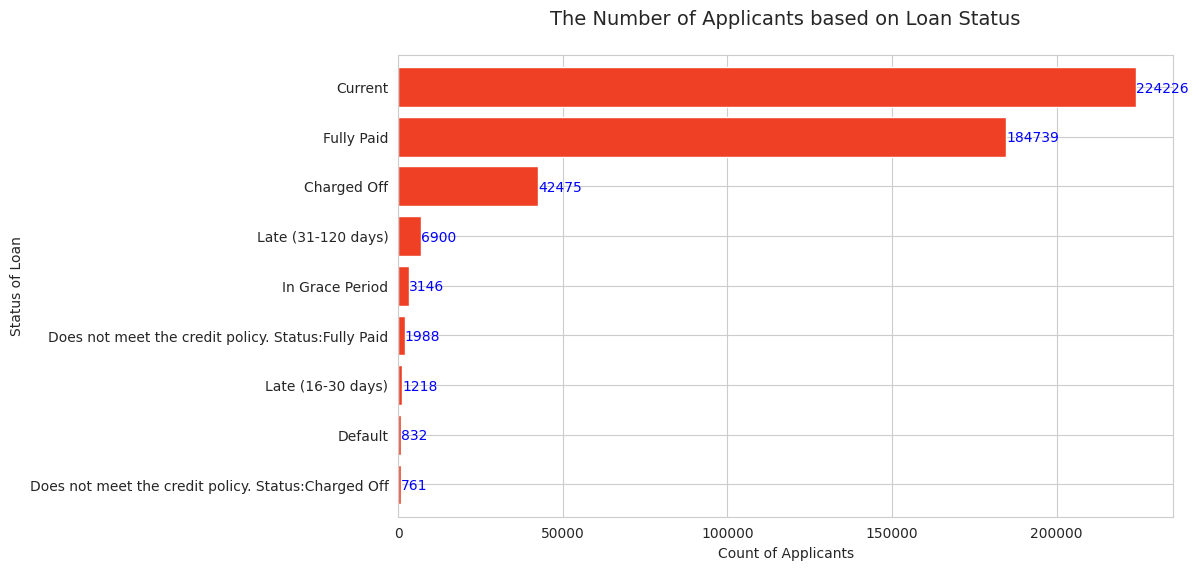

In [ ]:
# visualization
sns.set_style('whitegrid')
fig = plt.figure(figsize = (10,6))
grp = df['loan_status'].value_counts().sort_values(ascending=True)
ax = grp.plot(kind='barh', color='#EF4026', width=0.8)

plt.title('The Number of Applicants based on Loan Status\n', fontsize=14)
plt.ylabel('Status of Loan')
plt.xlabel('Count of Applicants')

for i, v in enumerate(grp.values):
    ax.text(v + 50, i - 0.1, str(v), color='blue')

plt.show()

There are about 48% which is equal to about 224,226 applicants with loan status of Current, followed by loan status of Fully Paid with 39.6% or equal to 184,739 applicants.

#### Univariate: Target Class Balance

In [ ]:
grp_risk = df.groupby('risk').size().reset_index()
grp_risk.columns = ['target','total']
grp_risk['%'] = round(grp_risk['total']*100/sum(grp_risk['total']),2)
grp_risk.sort_values(by='total', ascending=False)

,target,total,%
1,Good Risk,414099,88.81
0,Bad Risk,52186,11.19


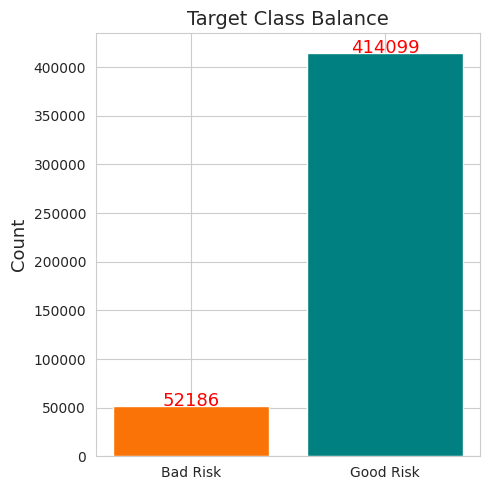

In [ ]:
#visualization
sns.set_style('whitegrid')
labels = ['Bad Risk', 'Good Risk']
colors = ["#F97306", "#008080"]
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(5, 5))

# create bar chart
ax.bar(labels, grp_risk['total'], color=colors)

# add value labels
for i, v in enumerate(grp_risk['total']):
    ax.text(i, v+5, str(v), ha='center', fontsize=13, color='red')

ax.set_title('Target Class Balance', fontsize=14)
ax.set_ylabel('Count', fontsize=13)
plt.tight_layout()


This dataset has a significant imbalance between classes, with the Bad Risk class making up only 11% and the Good Risk class making up 88% of the data.

#### Bivariate Analysis: Categorical Features

In [ ]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

#### Bivariate: Risk Status by Term

In [ ]:
# in general
df['term'].value_counts(normalize=True)

 36 months    0.724778
 60 months    0.275222
Name: term, dtype: float64

In [ ]:
# good risk
grp_term = good.groupby('term').size().reset_index()
grp_term.columns = ['term', 'total']
grp_term['%'] = round(grp_term['total']*100/sum(grp_term['total']),2)
print('Good Risk Status by Term')
grp_term.sort_values(by='total', ascending=False)

Good Risk Status by Term


,term,total,%
0,36 months,304374,73.5
1,60 months,109725,26.5


In [ ]:
# bad risk
grp_term = bad.groupby('term').size().reset_index()
grp_term.columns = ['term', 'total']
grp_term['%'] = round(grp_term['total']*100/sum(grp_term['total']),2)
print('Bad Risk Status by Term')
grp_term.sort_values(by='total', ascending=False)

Bad Risk Status by Term


,term,total,%
0,36 months,33579,64.34
1,60 months,18607,35.66


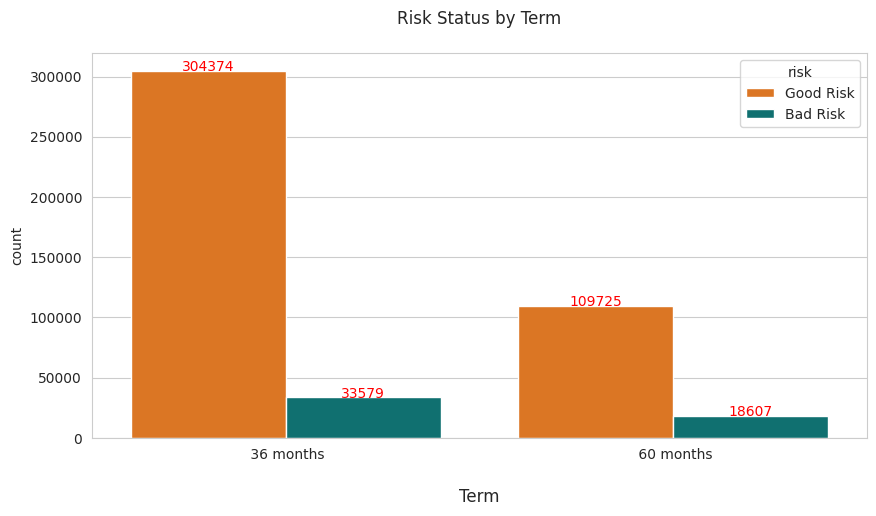

In [ ]:
# visualization
plt.figure(figsize=(10,5))
colors = ["#F97306", "#008080"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='term', hue = 'risk')
plt.title('Risk Status by Term\n', fontsize=12)
plt.xlabel('\nTerm', fontsize=12)

# Add value labels to each bar
for patch in fig.patches:
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width()/2., height+2, '%d' % int(height),
            fontsize=10, ha='center', color='red')
            
plt.show()


* Loan term shows how many payments are needed for a loan.
* There are only two loan term options: 36 months or 60 months. The majority of loans (73%) have a shorter term of 36 months.
* Loans with a 36-month period have nearly twice the chance of being bad risk compared to loans with a 60-month period.

#### Bivariate: Risk Status by Verification Status

In [ ]:
# in general
df['verification_status'].value_counts(normalize=True)

Verified           0.360413
Source Verified    0.321677
Not Verified       0.317911
Name: verification_status, dtype: float64

In [ ]:
# good risk
grp_vs = good.groupby(['verification_status']).size().reset_index()
grp_vs.columns = ['verification_status', 'total']
grp_vs['%'] = round(grp_vs['total']*100/sum(grp_vs['total']),2)
print('Good Risk Status by Verification Status')
grp_vs.sort_values(by='total', ascending=False)

Good Risk Status by Verification Status


,verification_status,total,%
2,Verified,146164,35.30
0,Not Verified,134032,32.37
1,Source Verified,133903,32.34


In [ ]:
# bad risk
grp_vs = bad.groupby(['verification_status']).size().reset_index()
grp_vs.columns = ['verification_status', 'total']
grp_vs['%'] = round(grp_vs['total']*100/sum(grp_vs['total']),2)
print('Bad Risk Status by Verification Status')
grp_vs.sort_values(by='total', ascending=False)

Bad Risk Status by Verification Status


,verification_status,total,%
2,Verified,21891,41.95
1,Source Verified,16090,30.83
0,Not Verified,14205,27.22


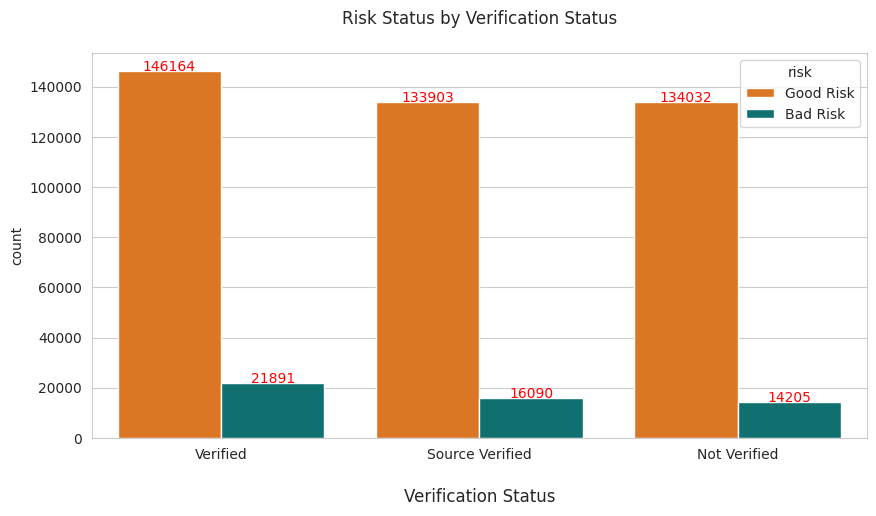

In [ ]:
plt.figure(figsize=(10,5))
colors = ["#F97306", "#008080"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='verification_status', hue = 'risk')
plt.title('Risk Status by Verification Status\n', fontsize=12)
plt.xlabel('\nVerification Status', fontsize=12)

# Add values to the bars
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2, height + 50, "{:.0f}".format(height), ha='center', fontsize=10, color='red')


* Verification status shows if the company has verified the income, not verified it, or verified the source of income.
* The majority of incomes (36%) have been verified by the company, while 31% have not been verified.

#### Bivariate: Risk Status by Payment Plan

In [ ]:
# replace
df['pymnt_plan'] = df['pymnt_plan'].replace(['n','y'],['No','Yes'])

In [ ]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

In [ ]:
# in general
df['pymnt_plan'].value_counts(normalize=True)

No     0.999981
Yes    0.000019
Name: pymnt_plan, dtype: float64

In [ ]:
# good risk
grp_pp = good.groupby(['pymnt_plan']).size().reset_index()
grp_pp.columns = ['pymnt_plan', 'total']
grp_pp['%'] = round(grp_pp['total']*100/sum(grp_pp['total']),2)
print('Good Risk Status by Payment Plan')
grp_pp.sort_values(by='total', ascending=False)

Good Risk Status by Payment Plan


,pymnt_plan,total,%
0,No,414095,100.0
1,Yes,4,0.0


In [ ]:
grp_pp = bad.groupby(['pymnt_plan']).size().reset_index()
grp_pp.columns = ['pymnt_plan', 'total']
grp_pp['%'] = round(grp_pp['total']*100/sum(grp_pp['total']),2)
print('Bad Risk Status by Payment Plan')
grp_pp.sort_values(by='total', ascending=False)

Bad Risk Status by Payment Plan


,pymnt_plan,total,%
0,No,52181,99.99
1,Yes,5,0.01


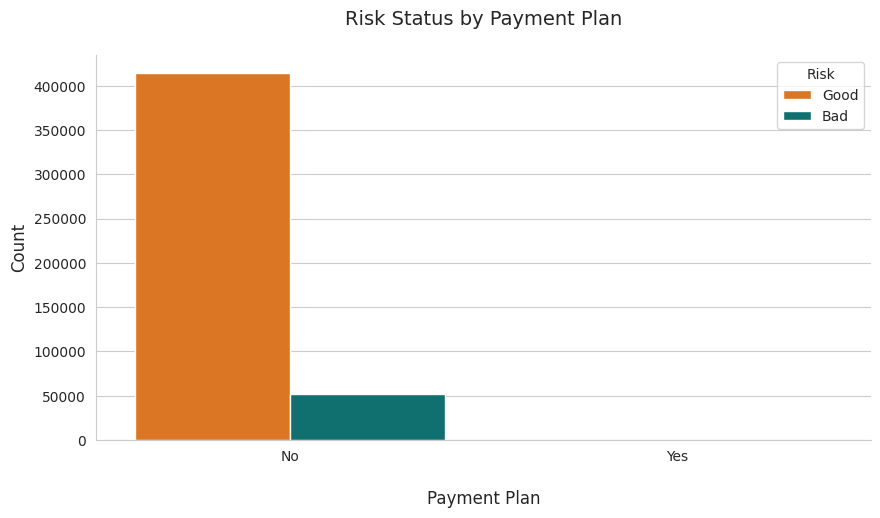

In [ ]:
#visualization
plt.figure(figsize=(10,5))
colors = ["#F97306", "#008080"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=df, x='pymnt_plan', hue='risk')
plt.title('Risk Status by Payment Plan\n', fontsize=14)
plt.xlabel('\nPayment Plan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Risk', loc='upper right', labels=['Good', 'Bad'])
sns.despine()

* Payment plan refers to whether a payment plan has been established for a loan.
* Most of the applicants (99%) did not set a repayment plan for their loan, indicating that they did not have a clear repayment strategy. It is noteworthy that only nine applicants had a payment plan.

#### Bivariate: Risk Status by Initial List Status

In [ ]:
# replace
df['initial_list_status'] = df['initial_list_status'].replace(['w','f'],['Whole Loan','Fractional Loan'])

In [ ]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

In [ ]:
# in general
df['initial_list_status'].value_counts(normalize=True)

Fractional Loan    0.649828
Whole Loan         0.350172
Name: initial_list_status, dtype: float64

In [ ]:
# good risk
grp_ils = good.groupby(['initial_list_status']).size().reset_index()
grp_ils.columns = ['initial_list_status', 'total']
grp_ils['%'] = round(grp_ils['total']*100/sum(grp_ils['total']),2)
print('Good Risk Status by Initial List Status')
grp_ils.sort_values(by='total', ascending=False)

Good Risk Status by Initial List Status


,initial_list_status,total,%
0,Fractional Loan,265883,64.21
1,Whole Loan,148216,35.79


In [ ]:
# bad risk
grp_ils = bad.groupby(['initial_list_status']).size().reset_index()
grp_ils.columns = ['initial_list_status', 'total']
grp_ils['%'] = round(grp_ils['total']*100/sum(grp_ils['total']),2)
print('Bad Risk Status by Initial List Status')
grp_ils.sort_values(by='total', ascending=False)

Bad Risk Status by Initial List Status


,initial_list_status,total,%
0,Fractional Loan,37122,71.13
1,Whole Loan,15064,28.87


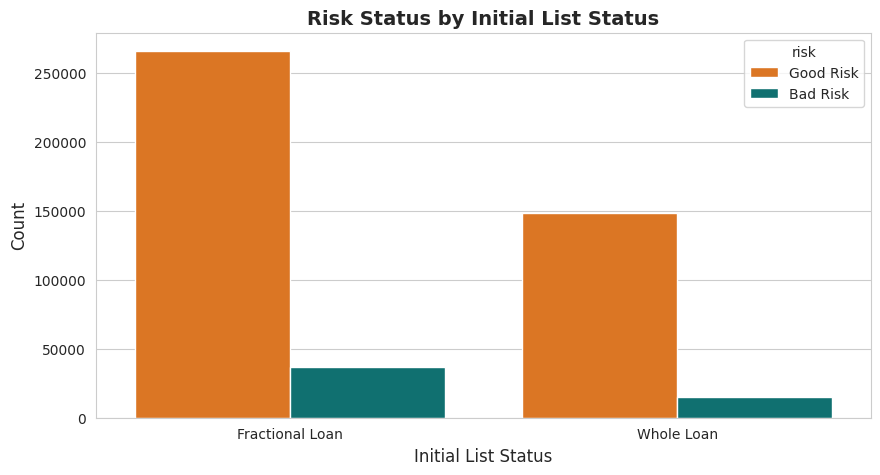

In [ ]:
#visualization
plt.figure(figsize=(10,5))
colors = ["#F97306", "#008080"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

ax = sns.countplot(data=df, x='initial_list_status', hue='risk')
ax.set_title('Risk Status by Initial List Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Initial List Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

* Initial list status tell us about the initial listing status of the loan.
* Loans can have either a Whole loan (W) or Fractional loan (F) status. This distinction is based on whether the loan was provided by a single creditor or multiple creditors.
* The majority of loans (64%) are listed as Fractional loans, which means they were funded by multiple creditors.

#### Bivariate: Risk Status by Purpose

In [ ]:
# in general
df['purpose'].value_counts(normalize=True)

debt_consolidation    0.588042
credit_card           0.223376
home_improvement      0.056912
other                 0.050806
major_purchase        0.021077
small_business        0.015040
car                   0.011574
medical               0.009870
moving                0.006421
vacation              0.005334
wedding               0.005025
house                 0.004866
educational           0.000905
renewable_energy      0.000753
Name: purpose, dtype: float64

In [ ]:
# bad risk
grp_p = good.groupby(['purpose']).size().reset_index()
grp_p.columns = ['purpose', 'total']
grp_p['%'] = round(grp_p['total']*100/sum(grp_p['total']),2)
print('Good Risk by Purpose')
grp_p.sort_values(by='total', ascending=False)

Good Risk by Purpose


,purpose,total,%
2,debt_consolidation,242359,58.53
1,credit_card,94957,22.93
4,home_improvement,23865,5.76
9,other,20351,4.91
6,major_purchase,8866,2.14
11,small_business,5467,1.32
0,car,4909,1.19
7,medical,3978,0.96
8,moving,2529,0.61
12,vacation,2182,0.53


In [ ]:
# bad risk
grp_p = bad.groupby(['purpose']).size().reset_index()
grp_p.columns = ['purpose', 'total']
grp_p['%'] = round(grp_p['total']*100/sum(grp_p['total']),2)
print('Bad Risk by Purpose')
grp_p.sort_values(by='total', ascending=False)

Bad Risk by Purpose


,purpose,total,%
2,debt_consolidation,31836,61.00
1,credit_card,9200,17.63
9,other,3339,6.40
4,home_improvement,2672,5.12
11,small_business,1546,2.96
6,major_purchase,962,1.84
7,medical,624,1.20
0,car,488,0.94
8,moving,465,0.89
5,house,322,0.62


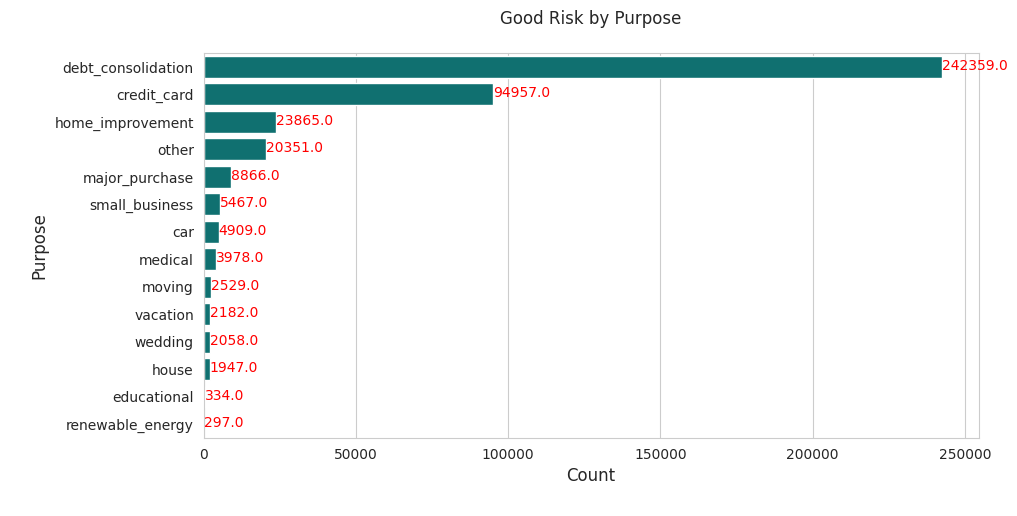

In [ ]:
plt.figure(figsize=(10,5))
colors = ["#008080"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=good, y='purpose', 
                    order=good['purpose'].value_counts().index, 
                    color=colors[0])

plt.title('Good Risk by Purpose\n', fontsize=12)
plt.ylabel('\nPurpose', fontsize=12)
plt.xlabel('Count\n', fontsize=12)

for i in fig.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.5, 
             str(round((i.get_width()), 2)), 
             fontsize=10, color='red')

plt.show()

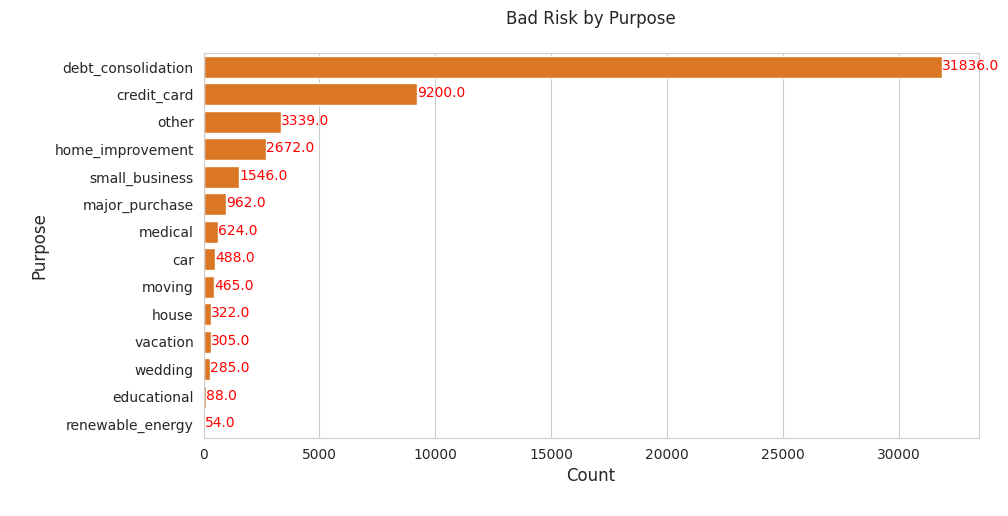

In [ ]:
plt.figure(figsize=(10,5))
colors = ["#F97306"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = bad, y='purpose',
              order = bad['purpose'].value_counts().index, 
              color = colors[0])

plt.title('Bad Risk by Purpose\n', fontsize=12)
plt.ylabel('\nPurpose', fontsize=12)
plt.xlabel('Count\n', fontsize=12)

# Add values to the bar chart
for i in fig.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.5, 
             str(round((i.get_width()), 2)), 
             fontsize=10, color='red')
    
plt.show()


* The purpose feature represents the type of loan requested by the applicants. It includes 13 categories that describe the purpose of the loan.
* Debt consolidation is the most popular category, accounting for 58% of all loans. Credit card and home improvement are other important categories.
* Loans for renewable energy have a very low bad risk status, only 0.1%, while debt consolidation loans have the highest bad risk status of all categories at 61%.

#### Bivariate: Risk Status by Home Ownership

In [ ]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
# reduce the number of categories of home ownership
def func(row):
    if row['home_ownership'] == 'MORTGAGE':
        val = 'MORTGAGE'
    elif (row['home_ownership'] == 'RENT'):
        val ='RENT'
    elif (row['home_ownership'] == 'OWN'):
        val ='OWN'
    else:
        val ='OTHERS'
    return val

df['home_ownership'] = df.apply(func, axis=1)

The `ANY` and `NONE` labels on the `home_ownership` feature can be combined with the `OTHER` label.

In [ ]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

In [ ]:
# in general
df['home_ownership'].value_counts(normalize=True)

MORTGAGE    0.505860
RENT        0.404201
OWN         0.089439
OTHERS      0.000500
Name: home_ownership, dtype: float64

In [ ]:
# good risk
grp_ho = good.groupby(['home_ownership']).size().reset_index()
grp_ho.columns = ['home_ownership', 'total']
grp_ho['%'] = round(grp_ho['total']*100/sum(grp_ho['total']),2)
print('Good Risk Status by Home Ownership')
grp_ho.sort_values(by='total', ascending=False)

Good Risk Status by Home Ownership


,home_ownership,total,%
0,MORTGAGE,212628,51.35
3,RENT,164223,39.66
2,OWN,37061,8.95
1,OTHERS,187,0.05


In [ ]:
# bad risk
grp_ho = bad.groupby(['home_ownership']).size().reset_index()
grp_ho.columns = ['home_ownership', 'total']
grp_ho['%'] = round(grp_ho['total']*100/sum(grp_ho['total']),2)
print('Bad Risk Status by Home Ownership')
grp_ho.sort_values(by='total', ascending=False)

Bad Risk Status by Home Ownership


,home_ownership,total,%
3,RENT,24250,46.47
0,MORTGAGE,23247,44.55
2,OWN,4643,8.90
1,OTHERS,46,0.09


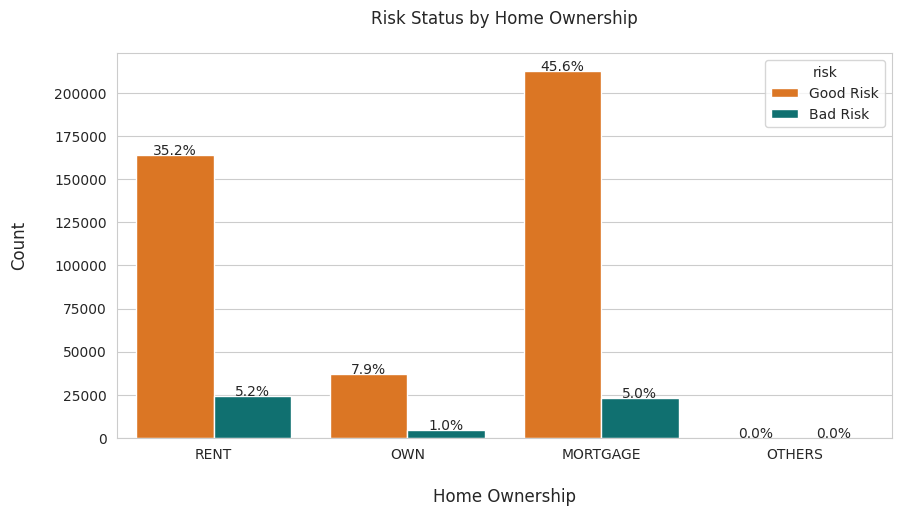

In [ ]:
#visualization
plt.figure(figsize=(10,5))
colors = ["#F97306", "#008080"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=df, x='home_ownership', hue='risk')

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format((height/len(df))*100),
            ha="center", fontsize=10) 

plt.title('Risk Status by Home Ownership\n', fontsize=12)
plt.xlabel('\nHome Ownership', fontsize=12)
plt.ylabel('Count\n', fontsize=12)
plt.show()


* Home ownership is a category in the loan registration process that indicates the applicant's current living situation.
* The majority of applicants either have a mortgage (50%) or are renting a home (40%).
* Applicants with an existing mortgage or those who are renting a home have a higher likelihood of being classified as having bad risk.

#### Bivariate: Risk Status by Grade

In [ ]:
# in general
df['grade'].value_counts(normalize=True)

B    0.293659
C    0.268705
D    0.164895
A    0.160561
E    0.076685
F    0.028371
G    0.007124
Name: grade, dtype: float64

In [ ]:
# good risk
grp_g = good.groupby(['grade']).size().reset_index()
grp_g.columns = ['grade', 'total']
grp_g['%'] = round(grp_g['total']*100/sum(grp_g['total']),2)
print('Good Risk by Grade')
grp_g.sort_values(by='total', ascending=False)

Good Risk by Grade


,grade,total,%
1,B,125921,30.41
2,C,110550,26.70
0,A,71912,17.37
3,D,64756,15.64
4,E,28618,6.91
5,F,9962,2.41
6,G,2380,0.57


In [ ]:
# bad risk
grp_g = bad.groupby(['grade']).size().reset_index()
grp_g.columns = ['grade', 'total']
grp_g['%'] = round(grp_g['total']*100/sum(grp_g['total']),2)
print('Good Risk by Grade')
grp_g.sort_values(by='total', ascending=False)

Good Risk by Grade


,grade,total,%
2,C,14743,28.25
3,D,12132,23.25
1,B,11008,21.09
4,E,7139,13.68
5,F,3267,6.26
0,A,2955,5.66
6,G,942,1.81


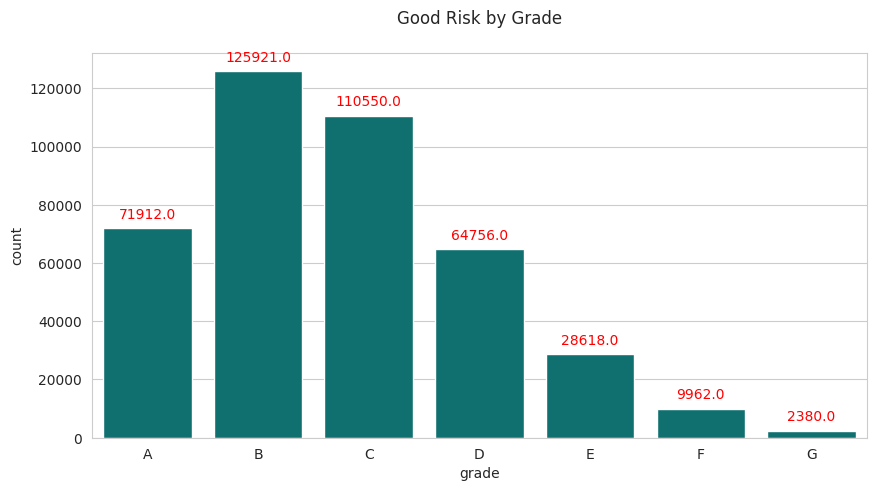

In [ ]:
#visualization
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')

ax = sns.countplot(data=good, x='grade', 
                   color='#008080', 
                   order=sorted(good['grade'].unique()))

for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',color='red')

plt.title('Good Risk by Grade\n', fontsize=12)
plt.show()

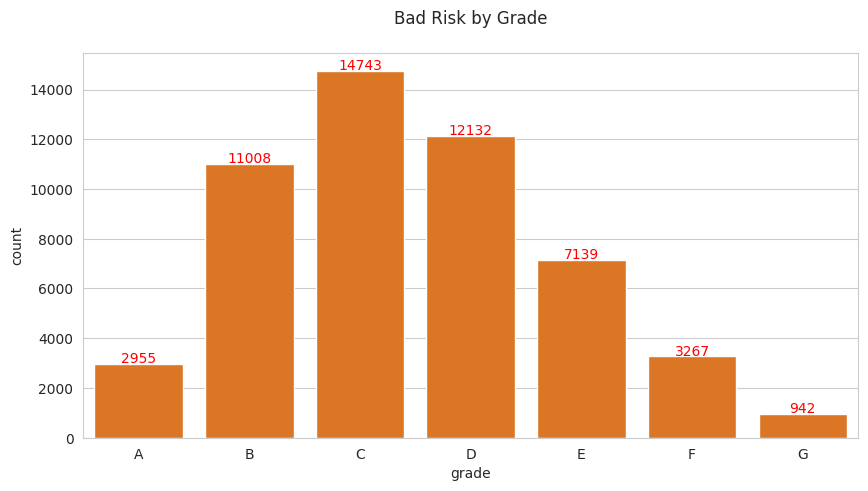

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')

ax = sns.countplot(data=bad, x='grade',
              color='#F97306', 
              order=sorted(bad['grade'].unique()))
plt.title('Bad Risk by Grade\n', fontsize=12)

# Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 50,
            '{:.0f}'.format(height), ha="center", color='red')

plt.show()


* The grade feature provides information about the loan's assigned grade by the lending company. This feature includes 7 different grades ranging from A to G.
* The majority of loans are given a grade of B (29.3%). Around 72% of the loans have a grade of C or higher, while less than 1% of the loans have a grade of G.

#### Bivariate: Risk Status by Sub-Grade

In [ ]:
# in general
df['sub_grade'].value_counts(normalize=True).head()

B3    0.067954
B4    0.065421
C1    0.057804
C2    0.057347
B2    0.057068
Name: sub_grade, dtype: float64

In [ ]:
# good risk
grp_sg = good.groupby(['sub_grade']).size().reset_index()
grp_sg.columns = ['sub_grade', 'total']
grp_sg['%'] = round(grp_sg['total']*100/sum(grp_sg['total']),2)
print('Good Risk by Sub-Grade')
grp_sg.sort_values(by='total', ascending=False)
grp_sg.head()

Good Risk by Sub-Grade


,sub_grade,total,%
0,A1,10332,2.50
1,A2,10636,2.57
2,A3,12121,2.93
3,A4,18191,4.39
4,A5,20632,4.98


In [ ]:
# bad risk
grp_sg = bad.groupby(['sub_grade']).size().reset_index()
grp_sg.columns = ['sub_grade', 'total']
grp_sg['%'] = round(grp_sg['total']*100/sum(grp_sg['total']),2)
print('Bad Risk by Sub-Grade')
grp_sg.sort_values(by='total', ascending=True)
grp_sg.head()

Bad Risk by Sub-Grade


,sub_grade,total,%
0,A1,209,0.40
1,A2,320,0.61
2,A3,447,0.86
3,A4,854,1.64
4,A5,1125,2.16


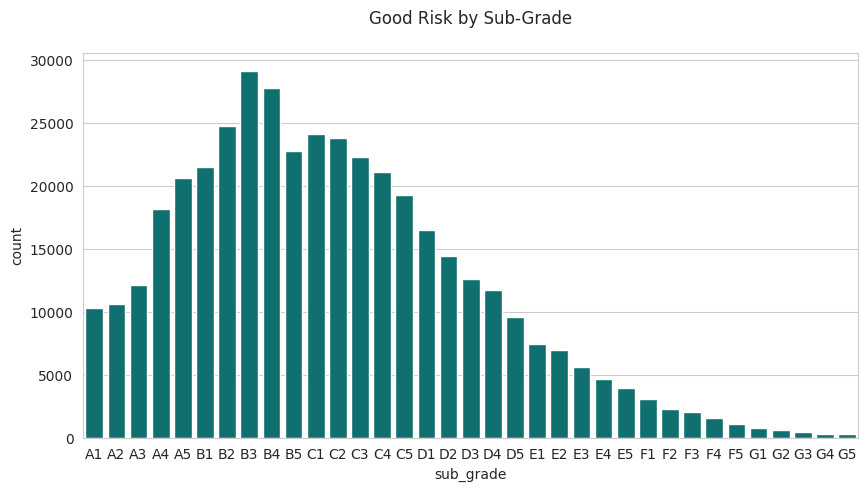

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')

sns.countplot(data = good, x='sub_grade', 
              color = '#008080', 
              order=sorted(good['sub_grade'].unique()))
plt.title('Good Risk by Sub-Grade\n', fontsize=12)

plt.show()

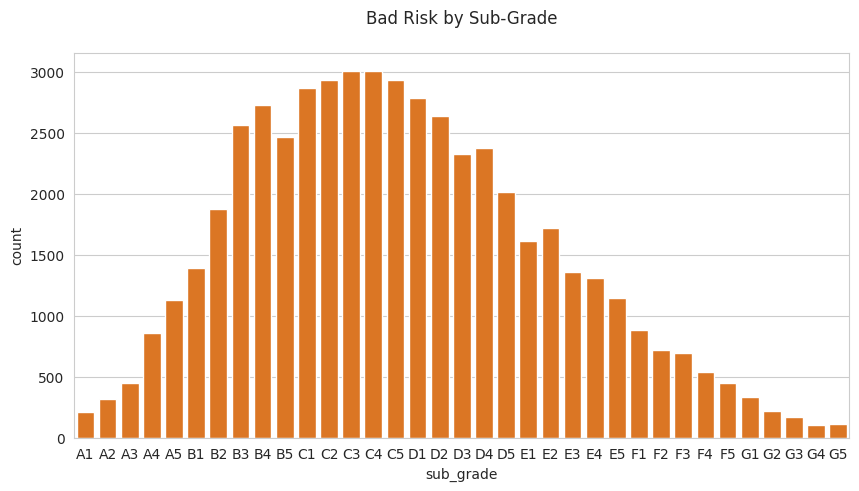

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')

sns.countplot(data = bad, x='sub_grade',
              color = '#F97306', 
              order=sorted(bad['sub_grade'].unique()))
plt.title('Bad Risk by Sub-Grade\n', fontsize=12)

plt.show()

#### Bivariate: Risk Status by Employment Length

In [ ]:
# in general
df['emp_length'].value_counts(normalize=True)

10+ years    0.336979
2 years      0.092915
3 years      0.082187
< 1 year     0.081444
5 years      0.069112
1 year       0.066525
4 years      0.062934
7 years      0.058795
6 years      0.058642
8 years      0.050295
9 years      0.040173
Name: emp_length, dtype: float64

In [ ]:
# table
grp_el = good.groupby(['emp_length']).size().reset_index()
grp_el.columns = ['emp_length', 'total']
grp_el['%'] = round(grp_el['total']*100/sum(grp_el['total']),2)
print('Good Risk by Employment Length')
grp_el.sort_values(by='total', ascending=False)

Good Risk by Employment Length


,emp_length,total,%
1,10+ years,134724,34.03
2,2 years,36726,9.28
3,3 years,32488,8.21
10,< 1 year,31838,8.04
5,5 years,27163,6.86
0,1 year,26236,6.63
4,4 years,24872,6.28
7,7 years,23201,5.86
6,6 years,22996,5.81
8,8 years,19880,5.02


In [ ]:
# bad risk
grp_el = bad.groupby(['emp_length']).size().reset_index()
grp_el.columns = ['emp_length', 'total']
grp_el['%'] = round(grp_el['total']*100/sum(grp_el['total']),2)
print('Bad Risk by Employment Length')
grp_el.sort_values(by='total', ascending=False)

Bad Risk by Employment Length


,emp_length,total,%
1,10+ years,15325,31.07
2,2 years,4647,9.42
10,< 1 year,4427,8.97
3,3 years,4108,8.33
5,5 years,3611,7.32
0,1 year,3386,6.86
4,4 years,3151,6.39
6,6 years,3116,6.32
7,7 years,2979,6.04
8,8 years,2515,5.10


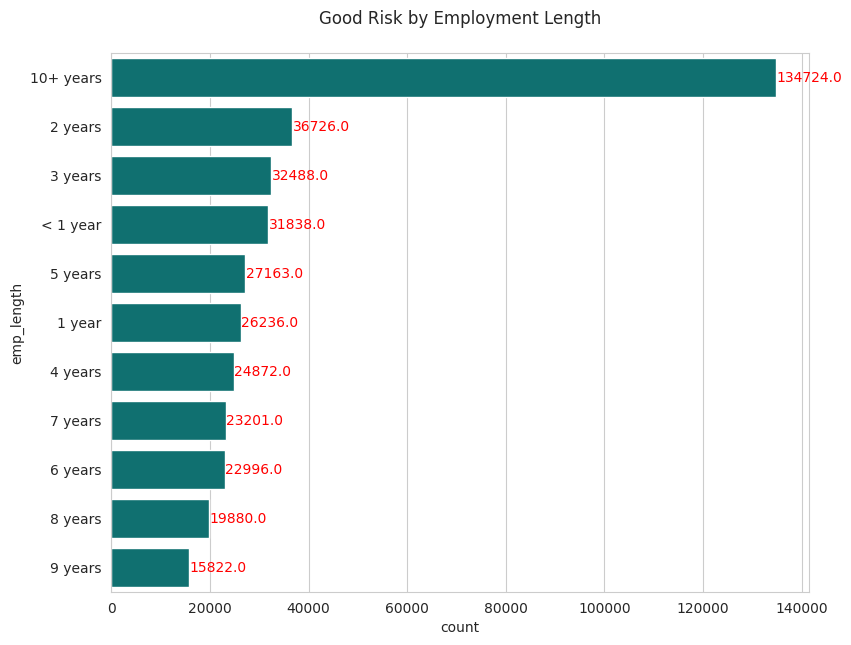

In [ ]:
#visualization
plt.figure(figsize=(9,7))
sns.set_style('whitegrid')

ax = sns.countplot(data = good, y='emp_length', 
                   color = '#008080', 
                   order = good['emp_length'].value_counts().index)
ax.set_title('Good Risk by Employment Length\n', fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_width()), 
                   (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                   ha='left', va='center', color='red')

plt.show()

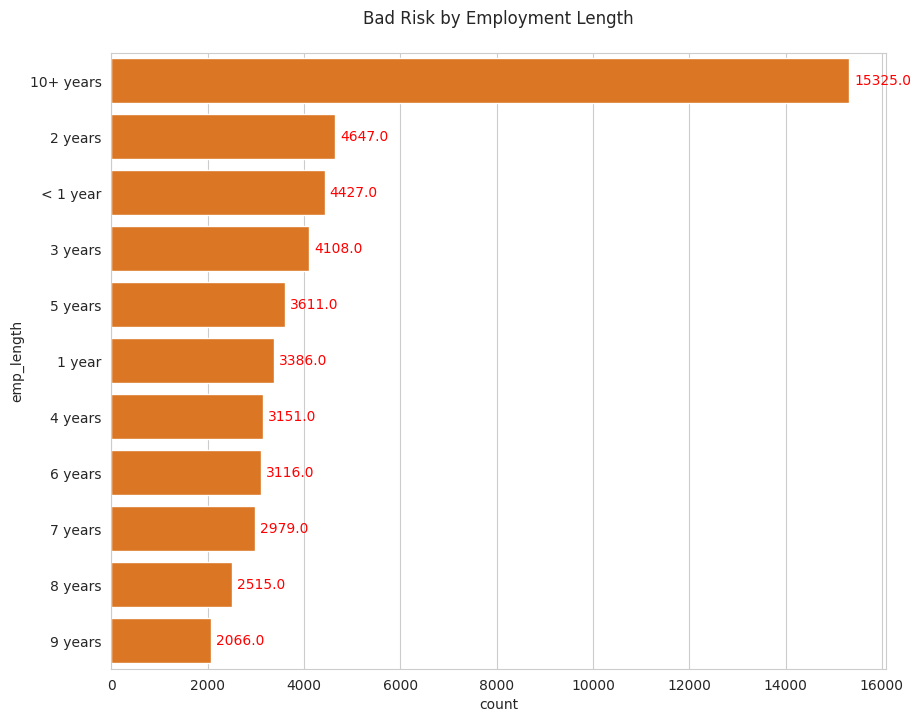

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')

ax = sns.countplot(data = bad, y='emp_length', 
                   color = '#F97306', 
                   order = bad['emp_length'].value_counts().index)
ax.set_title('Bad Risk by Employment Length\n', fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_width()), 
                   (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                   ha='left', va='center', color='red')

plt.show()

* The employment length feature has 11 levels, ranging from less than 1 year to 10+ years of experience.
* Applicants' employment length can be broadly divided into two categories: the most common category consists of applicants with 10+ years of experience (33.7%), while the other category comprises applicants with less than 3 years of experience (32.3%).

#### Bivariate Analysis: Numerical Features

In [ ]:
def plot_var(col_name, full_name, continuous):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # plot without risk status
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # plot with risk status
    if continuous:
        sns.boxplot(x=col_name, y='risk', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Risk Status')
    else:
        bad_rates = df.groupby(col_name)['risk'].value_counts(normalize=True).loc[:,'Bad Risk']
        sns.barplot(x=bad_rates.index, y=bad_rates.values, saturation=1, ax=ax2)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

#### Bivariate: Risk Status by Loan Amount

In [ ]:
# in general
df['loan_amnt'].describe()

count    466285.000000
mean      14317.277577
std        8286.509164
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,14624.953053,8390.633508,500.0,8000.0,12800.0,20000.0,35000.0
Good Risk,414099.0,14278.503389,8272.492476,500.0,8000.0,12000.0,20000.0,35000.0


<ipython-input-69-13ffa7faca4d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)


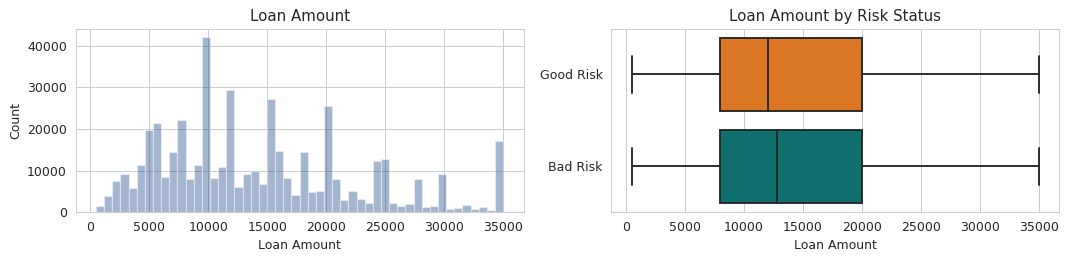

In [ ]:
# visualization
plot_var('loan_amnt', 'Loan Amount', continuous=True)

* The loan amounts range from 500 to 35,000, with a median of $12,000.
* The median loan amount for applicants with bad risk is slightly higher than that of applicants with good risk. This suggests that loans with bad risk tend to have higher loan amounts.

#### Bivariate: Risk Status by Interest Rate

In [ ]:
# in general
df['int_rate'].describe()

count    466285.000000
mean         13.829236
std           4.357587
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,15.973031,4.256379,5.42,13.05,15.61,18.85,26.06
Good Risk,414099.0,13.559068,4.294915,5.42,10.49,13.35,16.29,26.06


<ipython-input-69-13ffa7faca4d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)


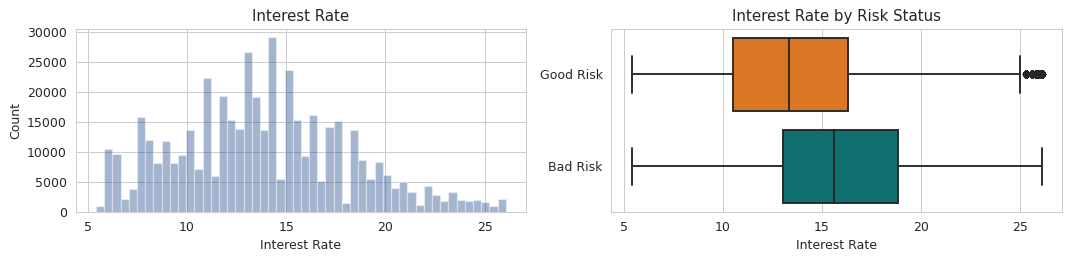

In [ ]:
# visualization
plot_var('int_rate', 'Interest Rate', continuous=True)

* The loans have interest rates ranging from 5.42% to 26.06%, with a median of 13.6%.
* The applicants with bad risk loans generally receive loans with higher interest rates. This suggests that those with higher interest rates may have a greater risk of defaulting on the loan.

#### Bivariate: Risk Status by Installment

In [ ]:
# in general
df['installment'].describe()

count    466285.000000
mean        432.061201
std         243.485550
min          15.670000
25%         256.690000
50%         379.890000
75%         566.580000
max        1409.990000
Name: installment, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,442.587052,246.432087,15.91,266.995,392.50,574.40,1408.13
Good Risk,414099.0,430.734701,243.079648,15.67,255.040,377.88,565.18,1409.99


<ipython-input-69-13ffa7faca4d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)


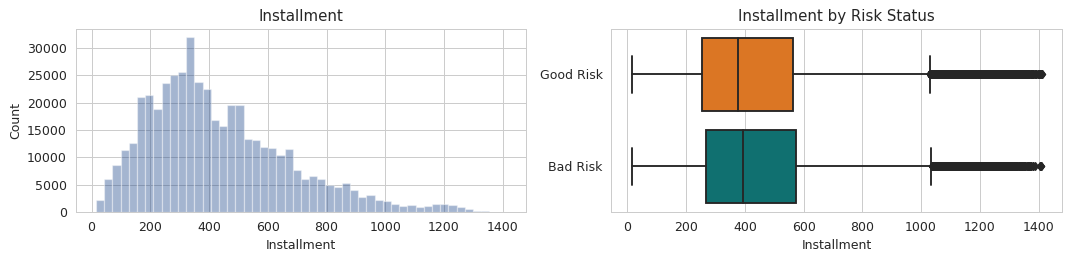

In [ ]:
# visualization
plot_var('installment', 'Installment', continuous=True)

* The installments for loans range from 15.67 to 1,409.99 per month, with a median installment of $379.89 per month.
* Applicants with bad risk tend to have higher installment amounts, indicating that they may have difficulty paying off their loans.

#### Bivariate: Risk Status by Annual Income

In [ ]:
# in general
df['annual_inc'].describe()

count    4.662810e+05
mean     7.327738e+04
std      5.496357e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.896000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,65615.836951,41219.446894,2000.0,41000.0,57000.0,80000.0,1250000.0
Good Risk,414095.0,74242.921654,56384.984019,1896.0,45000.0,64000.0,90000.0,7500000.0


<ipython-input-69-13ffa7faca4d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)


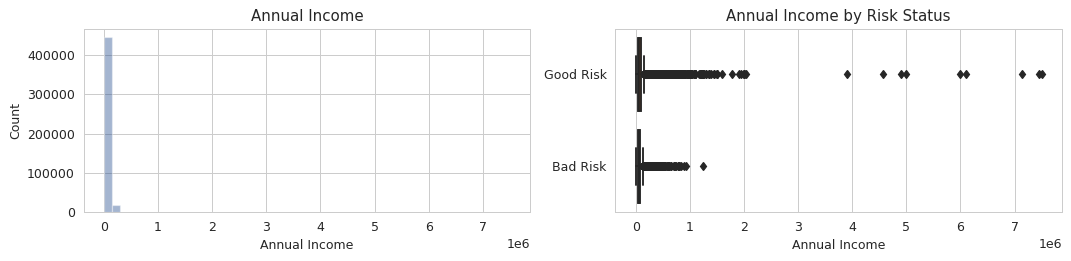

In [ ]:
# visualization
plot_var('annual_inc', 'Annual Income', continuous=True)

* The annual income of applicants has a wide range from 1,896 to 7,500,000 with a median of $63,000.
* The data suggests that applicants with higher income tend to have a better repayment record, implying that a higher income level could be a positive factor for loan approval.

#### Bivariate: Risk Status by Recoveries

In [ ]:
# in general
df['recoveries'].describe()

count    466285.000000
mean         85.344211
std         552.216084
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['recoveries'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,762.555581,1486.036802,0.0,0.0,0.0,999.7625,33520.27
Good Risk,414099.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.00


<ipython-input-69-13ffa7faca4d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)


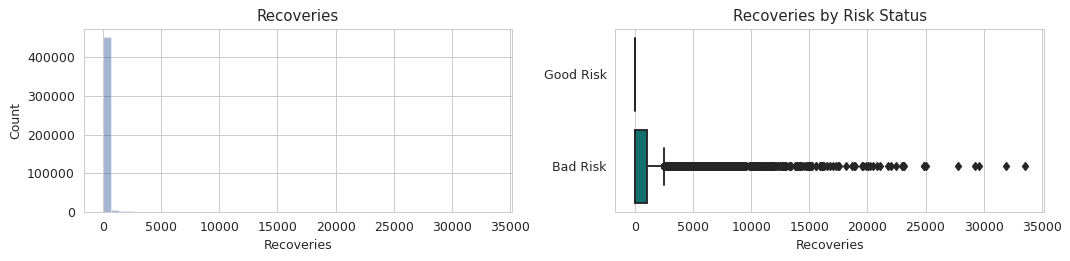

In [ ]:
# visualization
plot_var('recoveries', 'Recoveries', continuous=True)

* The recoveries of loans range from 0 to 33,520, with a median of $0.
* Loans with bad risk tend to have recoveries greater than 0, indicating that applicants with recoveries greater than 0 are less likely to repay their loans. Conversely, applicants who are likely to repay the loan have a recoveries value of 0.

#### Bivariate: Risk Status by Collection Recovery Fee

In [ ]:
# in general
df['collection_recovery_fee'].describe()

count    466285.000000
mean          8.961534
std          85.491437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7002.190000
Name: collection_recovery_fee, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['collection_recovery_fee'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,80.071836,244.154672,0.0,0.0,0.0,18.0,7002.19
Good Risk,414099.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00


<ipython-input-69-13ffa7faca4d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)


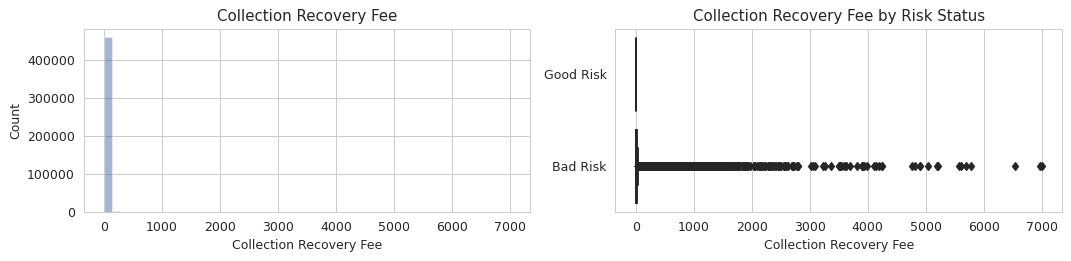

In [ ]:
# visualization
plot_var('collection_recovery_fee', 'Collection Recovery Fee', continuous=True)

* The collection recovery fee ranges from 0 to 7,002, with a median value of $0.
* Bad risk loans typically have a collection recovery fee greater than 0, indicating that borrowers with such fees are more likely to default on their loans. In contrast, borrowers who are likely to repay their loans have a collection recovery fee of 0.

#### Bivariate: Risk Status by Total Principal Received

In [ ]:
# in general
df['total_rec_prncp'].describe()

count    466285.000000
mean       8866.014657
std        7031.687997
min           0.000000
25%        3708.560000
50%        6817.760000
75%       12000.000000
max       35000.030000
Name: total_rec_prncp, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['total_rec_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,3829.815241,3581.790642,0.00,1411.555,2790.015,5078.055,34483.27
Good Risk,414099.0,9500.691637,7103.511739,273.66,4214.910,7500.000,12481.370,35000.03


<ipython-input-69-13ffa7faca4d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)


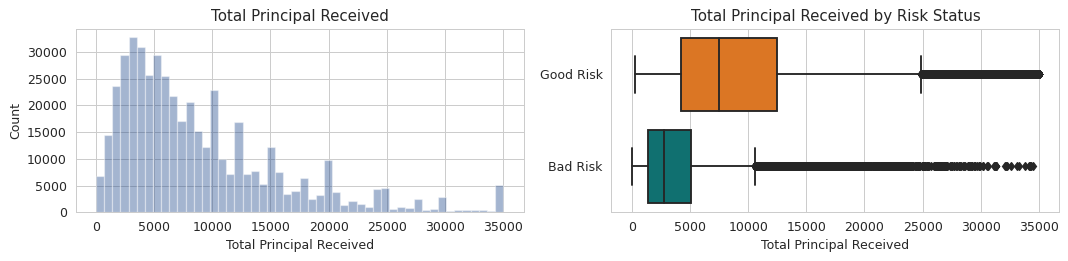

In [ ]:
# visualization
plot_var('total_rec_prncp', 'Total Principal Received', continuous=True)

* The total principal received on loans ranges from 0 to 35,000, with a median of $6,817.
* It appears that bad risk loans tend to have lower principal received values than good risk loans. This suggests that applicants with lower principal received values may have a higher chance of defaulting on their loans and being classified as a bad risk.

#### Bivariate: Risk Status by Last Payment Amount

In [ ]:
# in general
df['last_pymnt_amnt'].describe()

count    466285.000000
mean       3123.913796
std        5554.737393
min           0.000000
25%         312.620000
50%         545.960000
75%        3187.510000
max       36234.440000
Name: last_pymnt_amnt, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['last_pymnt_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,461.319145,617.624970,0.0,245.7925,381.50,575.120,34833.35
Good Risk,414099.0,3459.461973,5804.263471,0.0,323.3800,588.08,4272.305,36234.44


<ipython-input-69-13ffa7faca4d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)


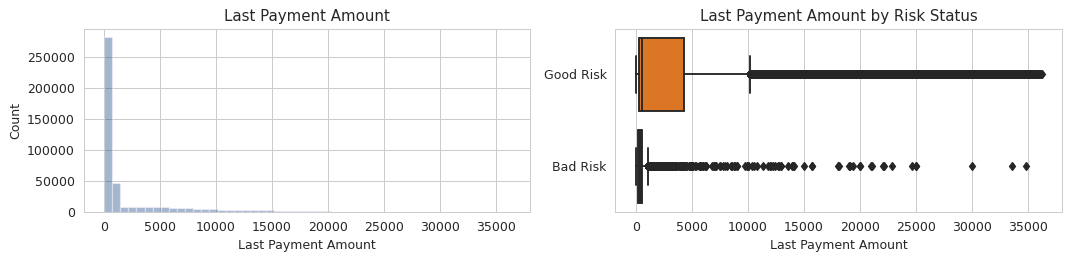

In [ ]:
# visualization
plot_var('last_pymnt_amnt', 'Last Payment Amount', continuous=True)

* The last payment amount on the loans ranges from $0 to $36,234, with a median value of $545.96.
* Loans with bad risk tend to have lower last payment amounts, indicating that applicants with a lower last payment amount are more likely to default on the loan.

#### The Remaining Numerical Features

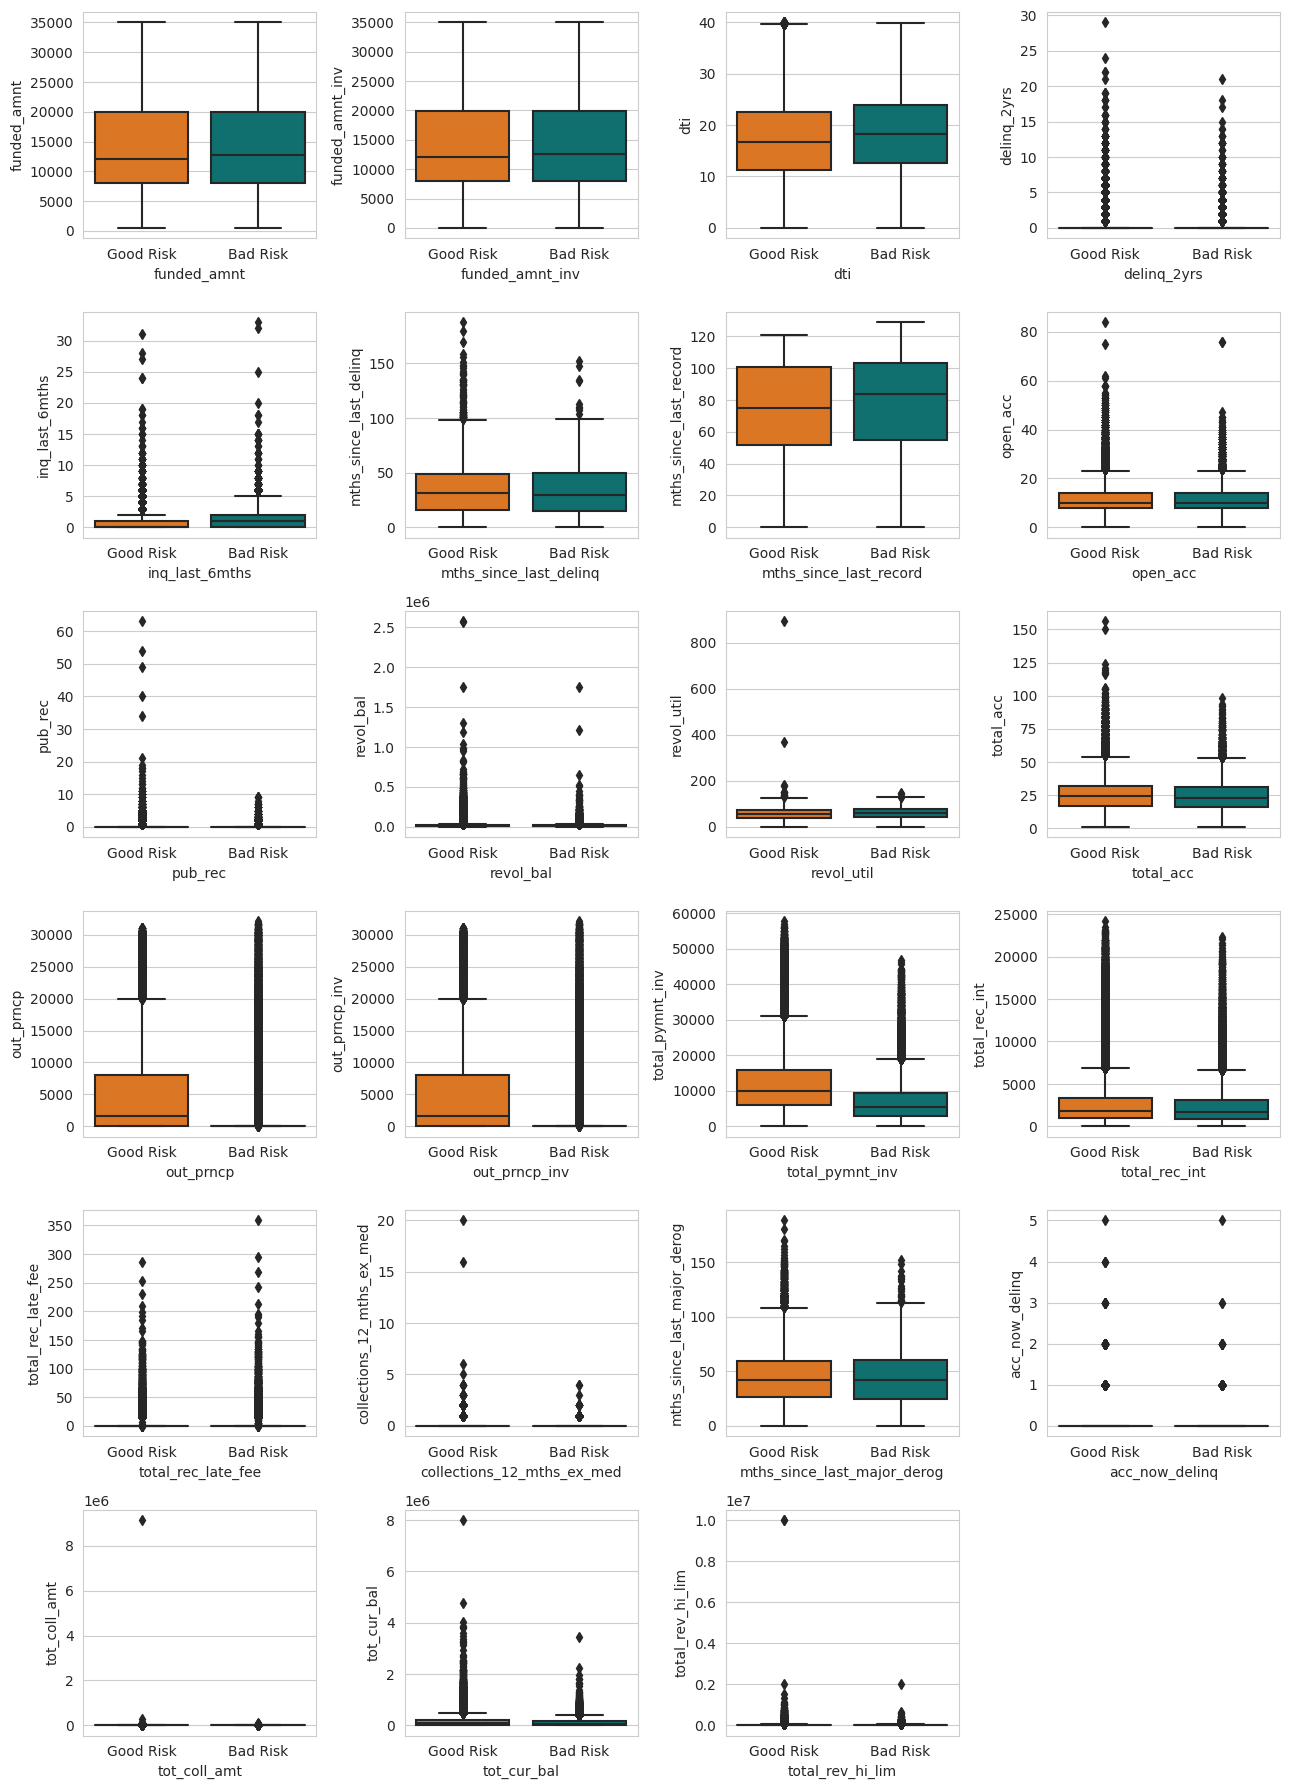

In [ ]:
num = ['funded_amnt', 'funded_amnt_inv', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'collections_12_mths_ex_med', 
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# visualization
fig = plt.figure(figsize=(13,18))

for i in range(len(num)):
    plt.subplot(6, 4, i+1)
    sns.boxplot(y=df[num[i]], x=df['risk'])
    plt.xlabel(num[i])
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.tight_layout()
plt.show()

#### Bivariate: Total Loan Issued Over Time

In [ ]:
df1 = df.copy()

In [ ]:
df1["issue_d_year"] = df1["issue_d"].dt.strftime('%Y')
issue_agg = df1.groupby(["issue_d_year"])[["id"]].nunique()
issue_agg.rename(columns={"id": "count"}, inplace=True)
issue_agg.reset_index(inplace=True)
issue_agg

,issue_d_year,count
0,2007,603
1,2008,2393
2,2009,5281
3,2010,12537
4,2011,21721
5,2012,53367
6,2013,134755
7,2014,235628


In [ ]:
def plot_df(df, x, y, title="", xlabel='issue_d_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.xticks(rotation=45)
    
    for i, val in enumerate(y):
        plt.annotate(str(val), xy=(x[i], val), xytext=(x[i], val+500), ha='center', va='center', color='red')
    
    plt.show()

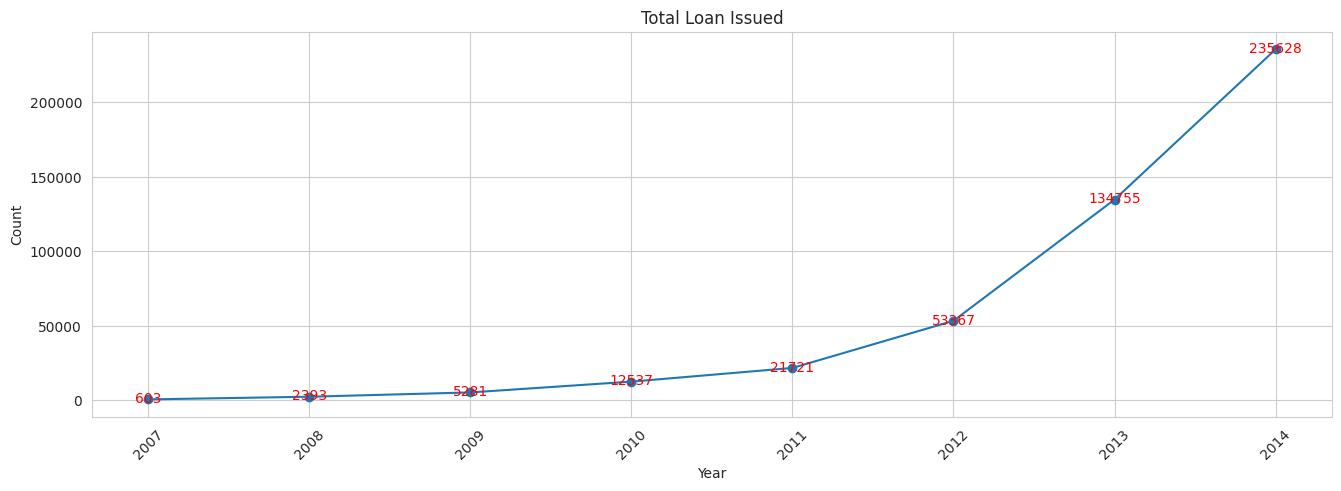

In [ ]:
plot_df(issue_agg, x=issue_agg['issue_d_year'], y=issue_agg["count"], title="Total Loan Issued", xlabel='Year', ylabel = "Count")

* The lending company issued a growing number of loans each year, with the peak year being 2014 when 235,628 loans were issued in total.
* The largest increase in loan volume occurred between 2013 and 2014, with an additional 100,873 loans issued during this time period.

#### Per Risk Status

In [ ]:
# table
issue_agg2 = df1.groupby(['issue_d_year', 'risk'])[["id"]].count()
issue_agg2.rename(columns={'id': 'count'}, inplace=True)
issue_agg2.reset_index(inplace=True)
issue_agg2 = issue_agg2.pivot(index=['issue_d_year'], columns='risk', values='count').reset_index()
issue_agg2 = issue_agg2.reset_index(drop=True).rename_axis(None, axis=1)
issue_agg2

,issue_d_year,Bad Risk,Good Risk
0,2007,158,445
1,2008,496,1897
2,2009,723,4558
3,2010,1761,10776
4,2011,3270,18451
5,2012,8361,45006
6,2013,17118,117637
7,2014,20299,215329


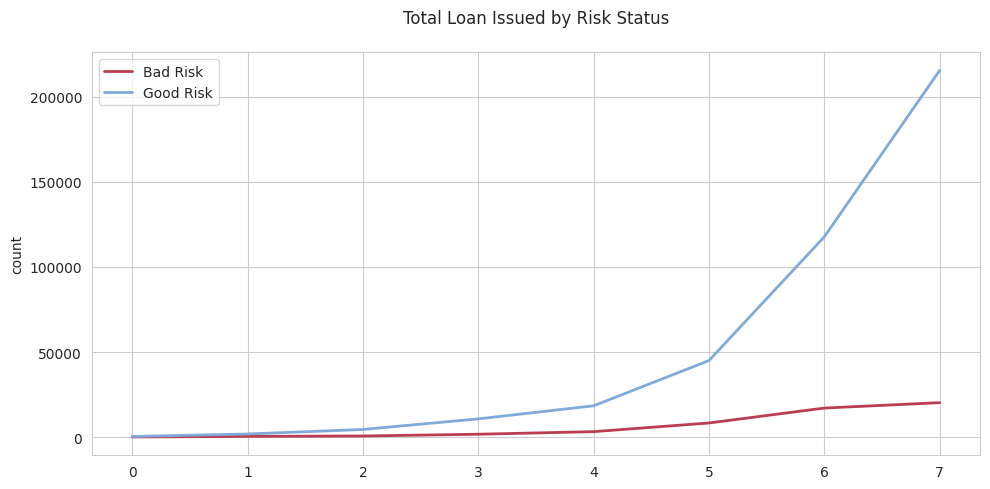

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,5))
issue_agg2.plot(kind='line', ax=ax, lw=2,
                color=['#ba3d51', '#7faadb'])

ax.set_title('Total Loan Issued by Risk Status\n',
        fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('count')
plt.tight_layout()
plt.show()

In [ ]:
# define the plotting function
def plot_df(df, x, y, title="", xlabel='issue_d_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.xticks(rotation=45)
    
    for i, val in enumerate(y):
        plt.annotate(str(val), xy=(x[i], val), xytext=(x[i], val+500), ha='center', va='center', color='red')

    plt.show()

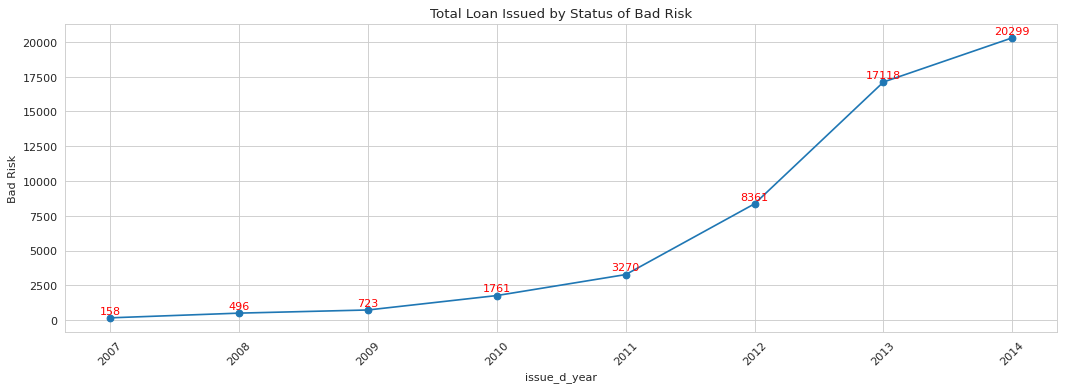

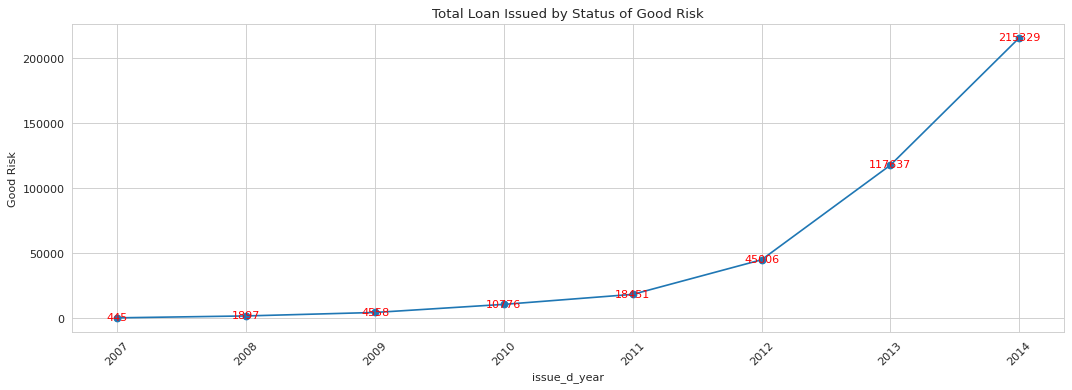

In [ ]:
for i in issue_agg2.columns:
    if i != 'issue_d_year':
        plot_df(issue_agg2, x=issue_agg2['issue_d_year'], y=issue_agg2[i], title='Total Loan Issued by Status of ' + i, ylabel = i, dpi=80)

The quantity of high-risk loans also shows an upward trend over the years. The most significant rise happened between 2012 and 2013, with a surge of 8,757 loans.

#### Bivariate: Total Credit Line Opened Over Time

In [ ]:
df1["earliest_cr_line_year"] = df1["earliest_cr_line"].dt.strftime('%Y')
cline_agg = df1.groupby(["earliest_cr_line_year"])[["id"]].nunique()
cline_agg.rename(columns={"id": "count"}, inplace=True)
cline_agg.reset_index(inplace=True)
cline_agg

,earliest_cr_line_year,count
0,1944,1
1,1946,2
2,1948,1
3,1949,1
4,1950,4
...,...,...
60,2007,12282
61,2008,7177
62,2009,3665
63,2010,2734


In [ ]:
def plot_df(df, x, y, title="", xlabel='earliest_cr_line_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.xticks(rotation=45)
    plt.show()

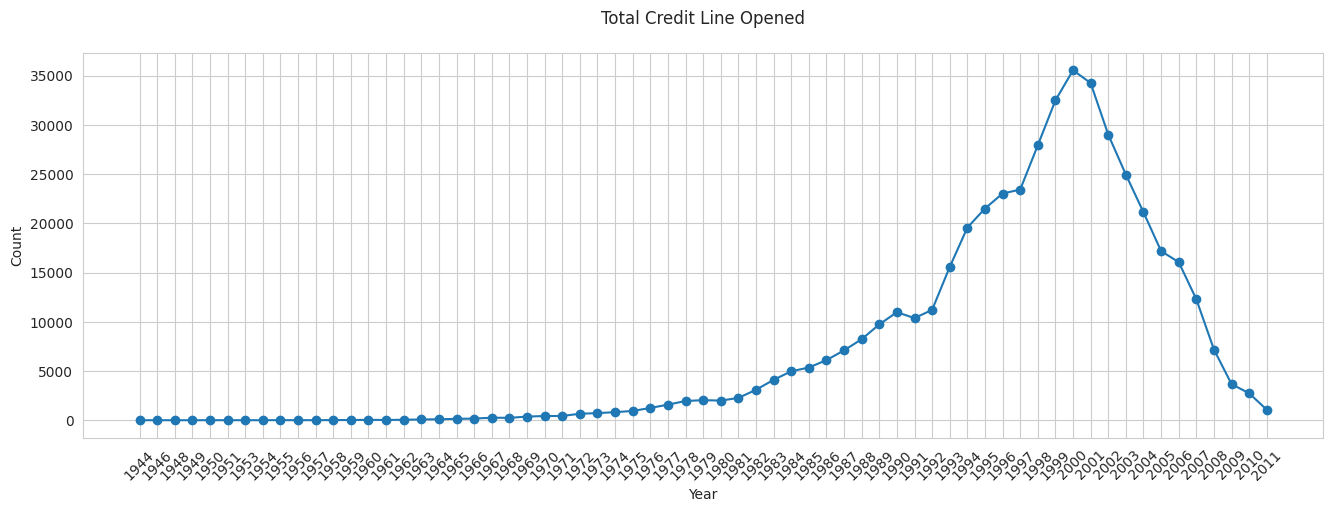

In [ ]:
plot_df(cline_agg, x=cline_agg['earliest_cr_line_year'], y=cline_agg["count"], title="Total Credit Line Opened\n", xlabel='Year', ylabel = "Count")

In the year 2000, the maximum number of credit lines opened was 35,539. However, after that year, the number of credit lines opened started to decline steadily.

#### Calculate the Total Loss Suffered by the Company

In [ ]:
# choose only bad risk loans
bad.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
8,1071795,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
9,1071570,5375,5375,5350.0,60 months,12.69,121.45,B,B5,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
12,1064687,9000,9000,9000.0,36 months,13.49,305.38,C,C1,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
14,1069057,10000,10000,10000.0,36 months,10.65,325.74,B,B2,3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk


In [ ]:
# calculate total loan to be paid
def word_strip(x):
  return x.strip()
  
bad['term'] = bad['term'].apply(lambda x: word_strip(x))
bad['term'] = bad['term'].replace(['60 months', '36 months'],[60,36])
bad['must_pay'] = bad['term'] * bad['installment']

<ipython-input-107-058dcb55852e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad['term'] = bad['term'].apply(lambda x: word_strip(x))
<ipython-input-107-058dcb55852e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad['term'] = bad['term'].replace(['60 months', '36 months'],[60,36])
<ipython-input-107-058dcb55852e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

* `installment` : The monthly payment owed by the applicants if the loan originates.
* `term `: The number of payments on the loan.

In [ ]:
# calculate the remaining loan to be paid
bad['remain_pay'] = bad['must_pay'] - (bad['total_pymnt'] + bad['total_rec_late_fee'] + bad['collection_recovery_fee'])

<ipython-input-108-4ce2ed6c1339>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad['remain_pay'] = bad['must_pay'] - (bad['total_pymnt'] + bad['total_rec_late_fee'] + bad['collection_recovery_fee'])


* `collection_recovery_fee` : Post charge off collection fee.
* `total_pymnt` : Payments received to date for total amount funded.
* `total_rec_late_fee` : Late fees received to date.

In [ ]:
# total applicants and loss
print('The number of applicants is', bad['id'].count())
print('Total loss suffered by the company is', bad['remain_pay'].sum())

The number of applicants is 52186
Total loss suffered by the company is 687949073.4686067


In total, the lending company faces a potential loss of 687 million from 52,186 applicants.

In [ ]:
bad1 = bad.copy()

In [ ]:
# reduce the number of categories of home ownership
def func(row):
    if row['loan_status'] in ['Charged Off', 'Does not meet the credit policy. Status:Charged Off']:
        val = 'Charged Off'
    elif row['loan_status'] in ['Late (16-30 days)', 'Late (31-120 days)']:
        val ='Late'
    else:
        val ='Default'
    return val

bad1['loan_status'] = bad1.apply(func, axis=1)

In [ ]:
# total loss per loan status
loss_agg= bad1.groupby(['loan_status']).agg({"remain_pay" : 'sum', 'id' : 'count'}).reset_index()
loss_agg.columns = ['loan status','total loss', 'total applicant']
loss_agg['% total loss'] = round(loss_agg['total loss']*100/sum(loss_agg['total loss']),2)
loss_agg['avg loss'] = (loss_agg['total loss'])/(loss_agg['total applicant'])
loss_agg.sort_values(by='total loss', ascending=False)

,loan status,total loss,total applicant,% total loss,avg loss
0,Charged Off,5.743563e+08,43236,83.49,13284.215244
2,Late,1.022933e+08,8118,14.87,12600.800273
1,Default,1.129945e+07,832,1.64,13581.065603


The lending company experiences the greatest amount of loss (83%) from the charged off loan status.

#### Breakdown: Loan Status of Charged Off

During this period, the applicants have failed to make their credit card or loan payments for a significant number of months, and the lender has abandoned its efforts to recover the outstanding debt. This implies that the lender has incurred a loss, as there is no longer any likelihood of receiving further payments on this loan.

In [ ]:
bad_co = bad.loc[bad['loan_status'].isin(['Does not meet the credit policy. Status:Charged Off', 'Charged Off'])]
bad_co.sample()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk,must_pay,remain_pay
90859,7134649,9000,9000,9000.0,36,16.78,319.89,C,C5,10+ years,...,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,Bad Risk,11516.04,7323.5682


In [ ]:
# total applicants and loss
print('The number of applicants is', bad_co['id'].count())
print('Total loss suffered by the company is', bad_co['remain_pay'].sum())

The number of applicants is 43236
Total loss suffered by the company is 574356330.2704517


The company that provides loans experienced a significant loss from 43,236 applicants, amounting to 574 million.

#### Breakdown: Loan Status of Late

During this period, some applicants did not make timely payments within the grace period. Such late payments can have negative consequences on the credit scores of applicants. However, the severity of the impact will vary based on the overall credit profile of the applicants and how far behind they fell on their payments.

In [ ]:
bad_lt = bad.loc[bad['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)'])]
bad_lt.sample()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk,must_pay,remain_pay
321920,23383333,15000,15000,15000.0,36,8.39,472.75,A,A5,10+ years,...,NaN,NaN,NaN,30300.0,NaN,NaN,NaN,Bad Risk,17019.0,9455.0


In [ ]:
# total applicants and loss
print('The number of applicants is', bad_lt['id'].count())
print('Total loss suffered by the company is', bad_lt['remain_pay'].sum())

The number of applicants is 8118
Total loss suffered by the company is 102293296.61607844


If the lending company does not take immediate action to collect overdue accounts, it is estimated that they may incur losses of approximately 102 million from 8,118 applicants.

#### Breakdown: Loan Status of Default

During this period, some applicants failed to repay their loans within a certain period of time, which caused the lending company to terminate the loan agreement. When a loan defaults, it becomes due and payable, and the outstanding balance is sent to a debt collection agency to recover the unpaid funds. Defaulting on a loan can have severe consequences for the applicant, including a significant reduction in their credit score, difficulty obtaining future credit, and even the seizure of personal assets.

In [ ]:
bad_df = bad[bad['loan_status'] == 'Default']
bad_df.sample()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk,must_pay,remain_pay
112807,6289419,4350,4350,4350.0,36,19.52,160.6,D,D4,3 years,...,NaN,NaN,NaN,5100.0,NaN,NaN,NaN,Bad Risk,5781.6,1928.04


In [ ]:
# total applicants and loss
print('The number of applicants is', bad_df['id'].count())
print('Total loss suffered by the company is', bad_df['remain_pay'].sum())

The number of applicants is 832
Total loss suffered by the company is 11299446.58207646


If the lending company fails to promptly contact 832 applicants who have missed payments, it could potentially face losses of around 11 million. It is crucial for the company to take action in collecting the unpaid funds to minimize the risk of financial loss.

### Data Cleansing

#### Drop Unnecessary Columns

In [ ]:
df.drop(['id'], inplace= True, axis=1)
df.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk
123038,9600,9600,9600.0,36 months,12.35,320.47,B,B4,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,40100.0,NaN,NaN,NaN,Bad Risk


#### Detecting Duplication

In [ ]:
print('Duplication status:', df.duplicated().values.any())
print('The number of duplication is:', df.duplicated().sum())

Duplication status: False
The number of duplication is: 0


#### Detecting Missing Values

In [ ]:
def check_missing_values(df):
    print('Missing values status:', df.isnull().values.any())
    percent_mv = df.isnull().sum() * 100 / len(df)
    dtypes = [df[col].dtype for col in df.columns]
    mv_df = pd.DataFrame({'data type':dtypes, '%': percent_mv})
    mv_df.sort_values('%', ascending=False, inplace=True)
    return mv_df

In [ ]:
check_missing_values(df)

Missing values status: True


,data type,%
open_il_24m,float64,100.0
verification_status_joint,float64,100.0
dti_joint,float64,100.0
open_il_12m,float64,100.0
open_il_6m,float64,100.0
...,...,...
funded_amnt,int64,0.0
total_rec_int,float64,0.0
total_rec_late_fee,float64,0.0
recoveries,float64,0.0


In [ ]:
# drop features that have large number of missing values (> 50%)
df.drop(df.iloc[:, 47:64], inplace=True, axis=1)
df.drop(['verification_status_joint','dti_joint', 
         'annual_inc_joint', 'mths_since_last_record', 
         'mths_since_last_major_derog', 'mths_since_last_delinq'], inplace=True, axis=1)

In [ ]:
# check for missing values
print('Missing values status:', df.isnull().values.any())
percent_mv = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
mv_df = pd.DataFrame({'data type':dtypes,
                                 '%': percent_mv})
mv_df.sort_values('%', ascending=False, inplace=True)
mv_df

Missing values status: True


,data type,%
next_pymnt_d,datetime64[ns],48.728567
emp_length,object,4.505399
last_pymnt_d,datetime64[ns],0.080637
revol_util,float64,0.072917
collections_12_mths_ex_med,float64,0.031097
last_credit_pull_d,datetime64[ns],0.009007
pub_rec,float64,0.006219
delinq_2yrs,float64,0.006219
open_acc,float64,0.006219
inq_last_6mths,float64,0.006219


<ipython-input-125-9c24907a5b1f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['annual_inc'], ax=ax[0][0])
<ipython-input-125-9c24907a5b1f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['revol_util'], ax=ax[0][1])
<ipython-input-125-9c24907a5b1f>:8: UserWarning: 

`distplot` is a dep

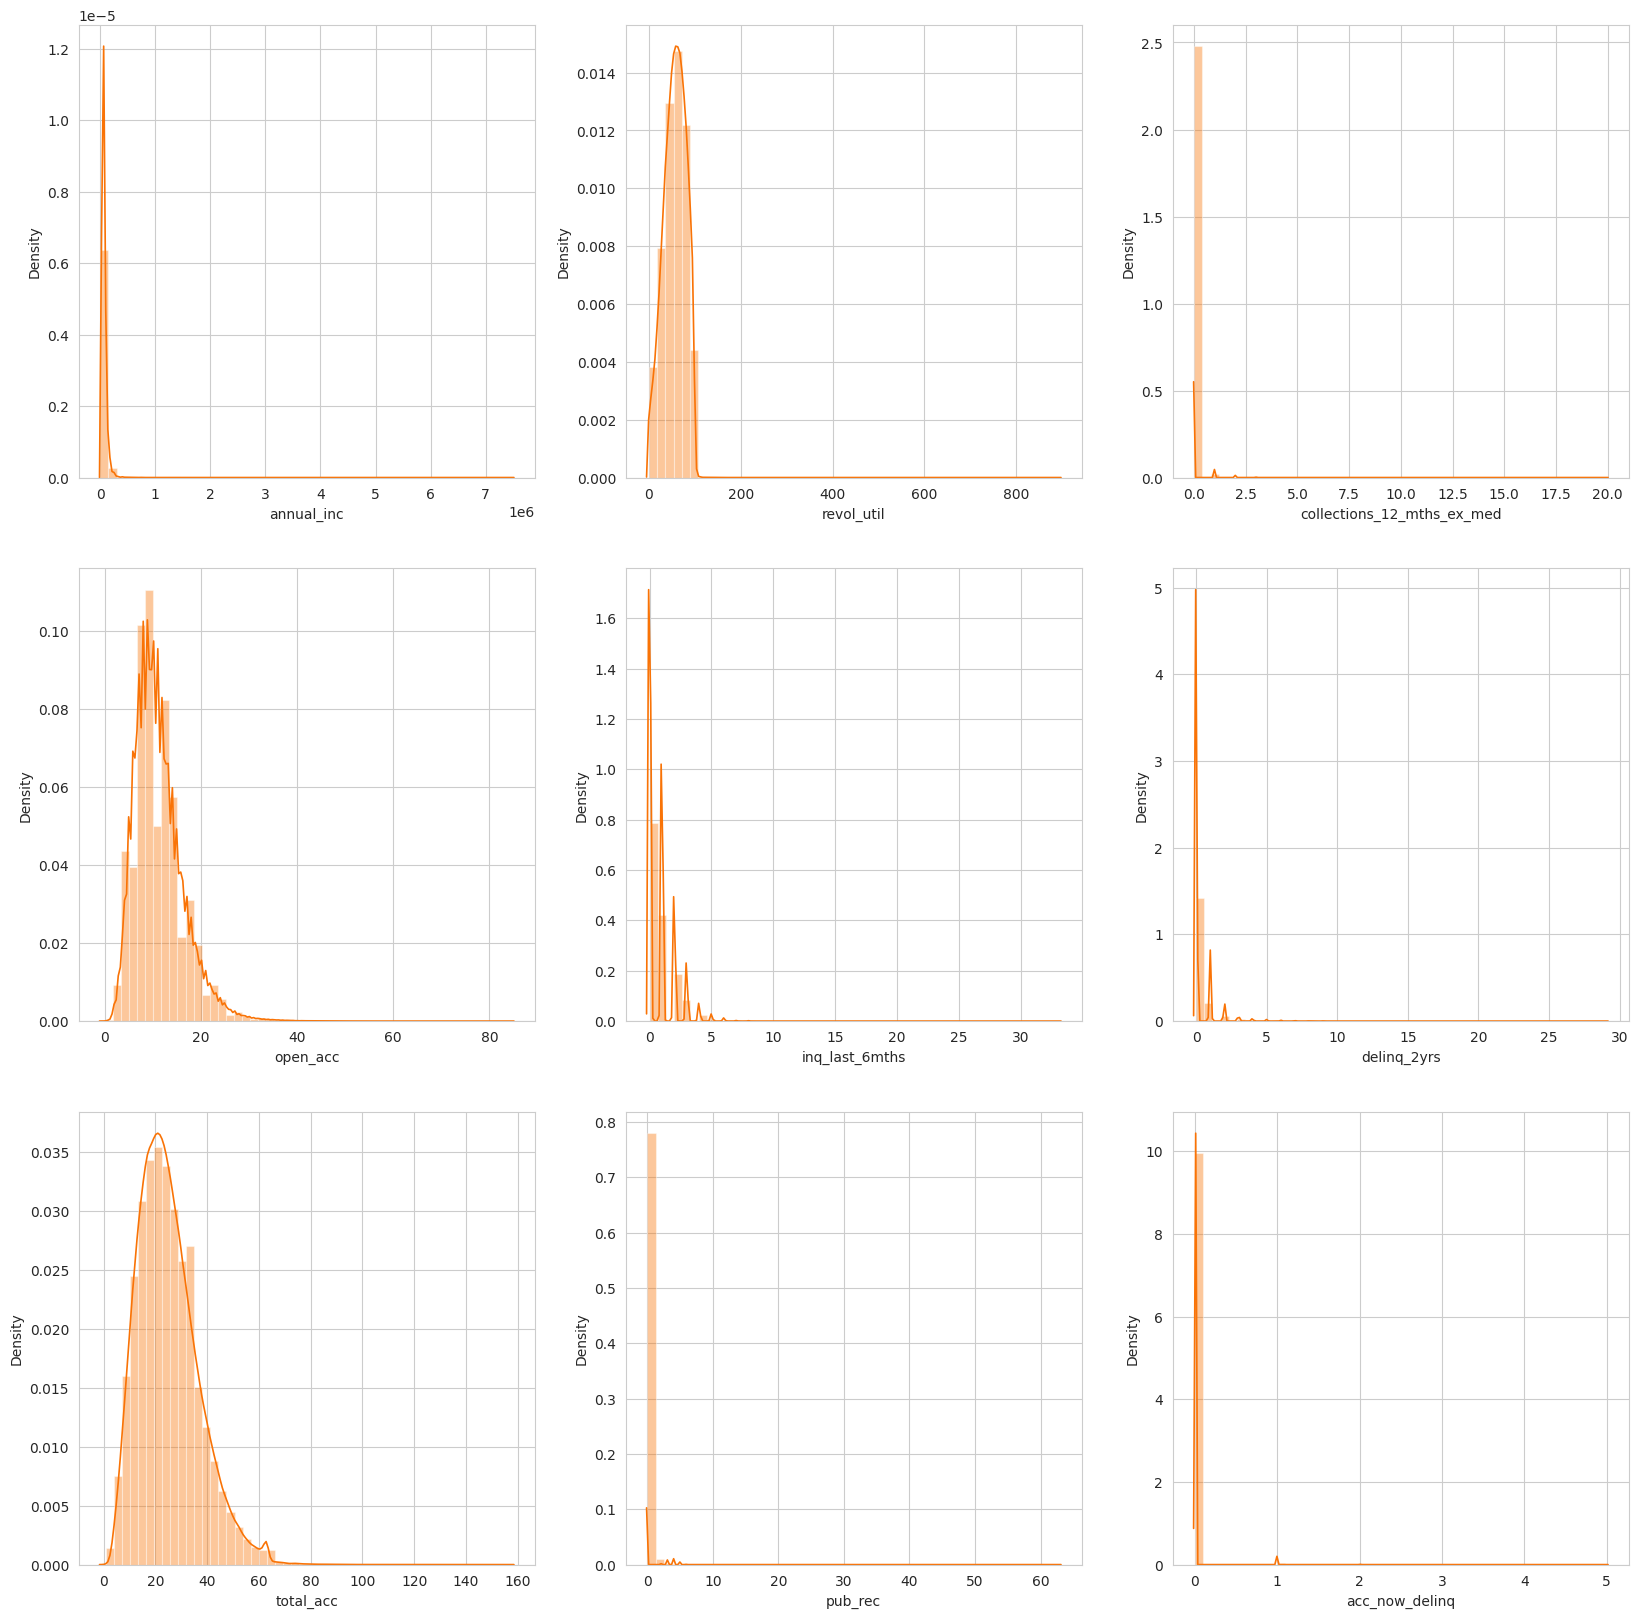

In [ ]:
# distribution of numerical features that have missing values
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,3, figsize=(20,20))
sns.set_context('paper', font_scale=1)

sns.distplot(df['annual_inc'], ax=ax[0][0])
sns.distplot(df['revol_util'], ax=ax[0][1])
sns.distplot(df['collections_12_mths_ex_med'], ax=ax[0][2])
sns.distplot(df['open_acc'], ax=ax[1][0])
sns.distplot(df['inq_last_6mths'], ax=ax[1][1])
sns.distplot(df['delinq_2yrs'], ax=ax[1][2])
sns.distplot(df['total_acc'], ax=ax[2][0])
sns.distplot(df['pub_rec'], ax=ax[2][1])
sns.distplot(df['acc_now_delinq'], ax=ax[2][2])

plt.show()

The numerical features mentioned above have a skewed distribution, therefore any missing values in these features will be replaced with their median value.

In [ ]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

categorical_columns = df.select_dtypes(include=['object', 'datetime64[ns]']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for column in df.columns:
    if df[column].isnull().any():
        if column in categorical_columns:
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            df[column] = df[column].fillna(df[column].median())


In [ ]:
# after imputation
print('Missing values status:', df.isnull().values.any())

Missing values status: False


## Building a Model

### Drop Unnecessary Feature

The loan status feature will be removed as it is not relevant for the analysis. Instead, the target feature for prediction will be the risk feature.

In [ ]:
df.drop(['loan_status'], inplace=True, axis=1)

### Create a New Feature from Date Type Features

I will separate these features into three parts, namely days, months, and years.

* `issue_d` : The month which the loan was funded.
* `earliest_cr_line` : The month the applicant's earliest reported credit line was opened.
* `last_pymnt_d` : Last month payment was received.
* `next_pymnt_d` : Next scheduled payment date.
* `last_credit_pull_d` : The most recent month LC pulled credit for this loan.

In [ ]:
df["issue_d_year"] = df["issue_d"].dt.year
df["issue_d_month"] = df["issue_d"].dt.month
df["issue_d_day"] = df["issue_d"].dt.day

df["earliest_cr_line_year"] = df["earliest_cr_line"].dt.year
df["earliest_cr_line_month"] = df["earliest_cr_line"].dt.month
df["earliest_cr_line_day"] = df["earliest_cr_line"].dt.day

df["last_pymnt_d_year"] = df["last_pymnt_d"].dt.year
df["last_pymnt_d_month"] = df["last_pymnt_d"].dt.month
df["last_pymnt_d_day"] = df["last_pymnt_d"].dt.day

df["next_pymnt_d_year"] = df["next_pymnt_d"].dt.year
df["next_pymnt_d_month"] = df["next_pymnt_d"].dt.month
df["next_pymnt_d_day"] = df["next_pymnt_d"].dt.day

df["last_credit_pull_d_year"] = df["last_credit_pull_d"].dt.year
df["last_credit_pull_d_month"] = df["last_credit_pull_d"].dt.month
df["last_credit_pull_d_day"] = df["last_credit_pull_d"].dt.day

In [ ]:
# drop the original
df.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], inplace=True, axis=1)

In [ ]:
df.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,earliest_cr_line_day,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day,next_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_day,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day
432127,18000,18000,17900.0,36 months,10.99,589.22,B,B2,3 years,MORTGAGE,...,1,2016,1,1,2016,2,1,2016,1,1


### Encoding

To convert categorical features to numeric, there are two methods:

1. Apply One Hot Encoding when:
 - The categorical feature is not ordinal.
 - The number of categorical features is less so one-hot encoding can be effectively applied.

2. Apply Label Encoding when:
 - The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
 - The number of categories is quite large as one-hot encoding can lead to high memory consumption.

In [ ]:
df.select_dtypes(include='object').columns.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'initial_list_status',
 'risk']

#### One Hot Encoding

`home_ownership`, `verification_status`, `pymnt_plan`, `purpose`, `initial_list_status` will be encoded using one hot encoding because these features is non-ordinal data.

In [ ]:
df_1 = df.drop(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'], axis=1)
cat_1 = df[['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oho = OneHotEncoder(sparse=False)

df_encoded = pd.DataFrame(oho.fit_transform(cat_1))
df_encoded.columns = oho.get_feature_names_out(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'])
concatenated_data = pd.concat([df_1, df_encoded], axis=1)
concatenated_data.sample()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_Fractional Loan,initial_list_status_Whole Loan
406760,28000,28000,28000.0,60 months,19.47,733.6,D,D5,7 years,105000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Manual Encoding

The "emp_length" feature will be encoded manually because using label encoding might change its meaning.

In [ ]:
concatenated_data['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2,
                                           '3 years':3, '4 years':4, '5 years':5,
                                           '6 years':6, '7 years':7, '8 years':8, 
                                           '9 years':9, '10+ years':10},inplace=True)

#### Label Encoding


The `term,` `grade`, `sub_grade`, `risk`, and `initial_list_status` features will be encoded using one-hot encoding because they are ordinal data.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# convert all non-numeric variables (ordinal) to numeric type
for column in concatenated_data.columns:
    if concatenated_data[column].dtype == np.number: continue
    # perform encoding for each non-numeric variables
    concatenated_data[column] = LabelEncoder().fit_transform(concatenated_data[column])

<ipython-input-136-19cf58fe92b1>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if concatenated_data[column].dtype == np.number: continue
<ipython-input-136-19cf58fe92b1>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if concatenated_data[column].dtype == np.number: continue
<ipython-input-136-19cf58fe92b1>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if concatenated_data[column].dtype == np.number: continue
<ipython-input-136-19cf58fe92b1>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if concatenated_data[column].dtype == np.number: continue
<ipython-input-1

In [ ]:
concatenated_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_Fractional Loan,initial_list_status_Whole Loan
0,171,171,4975.0,0,10.65,162.87,1,6,10,24000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,71,71,2500.0,1,15.27,59.83,2,13,0,30000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,67,67,2400.0,0,15.96,84.33,2,14,10,12252.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,371,371,10000.0,0,13.49,339.31,2,10,10,49200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,91,91,3000.0,1,12.69,67.79,1,9,1,80000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Feature Selection

In [ ]:
corr = concatenated_data.corrwith(concatenated_data["risk"])
corr.reset_index(name='corr value').sort_values('corr value', ascending=False)

,index,corr value
30,risk,1.000000
22,total_rec_prncp,0.254255
37,last_pymnt_d_year,0.252786
21,total_pymnt_inv,0.194638
20,total_pymnt,0.193977
...,...,...
33,issue_d_day,NaN
36,earliest_cr_line_day,NaN
39,last_pymnt_d_day,NaN
42,next_pymnt_d_day,NaN


* The feature that is highly correlated with the target feature "risk status" is `recoveries`.
* Other features such as `collection_recovery_fee`, `total_rec_prncp`, `last_pymnt_d_year`, `total_pymnt_inv`, `total_pymnt`, `last_pymnt_amnt`, `out_prncp`, `out_prncp_inv`, `total_rec_late_fee`, `grade`, `sub_grade`, `int_rate` ,`last_credit_pull_d_year`, `last_credit_pull_d_month`, and `last_pymnt_d_month` have a low correlation value, but it is still higher than the other features (correlation > 0.10).

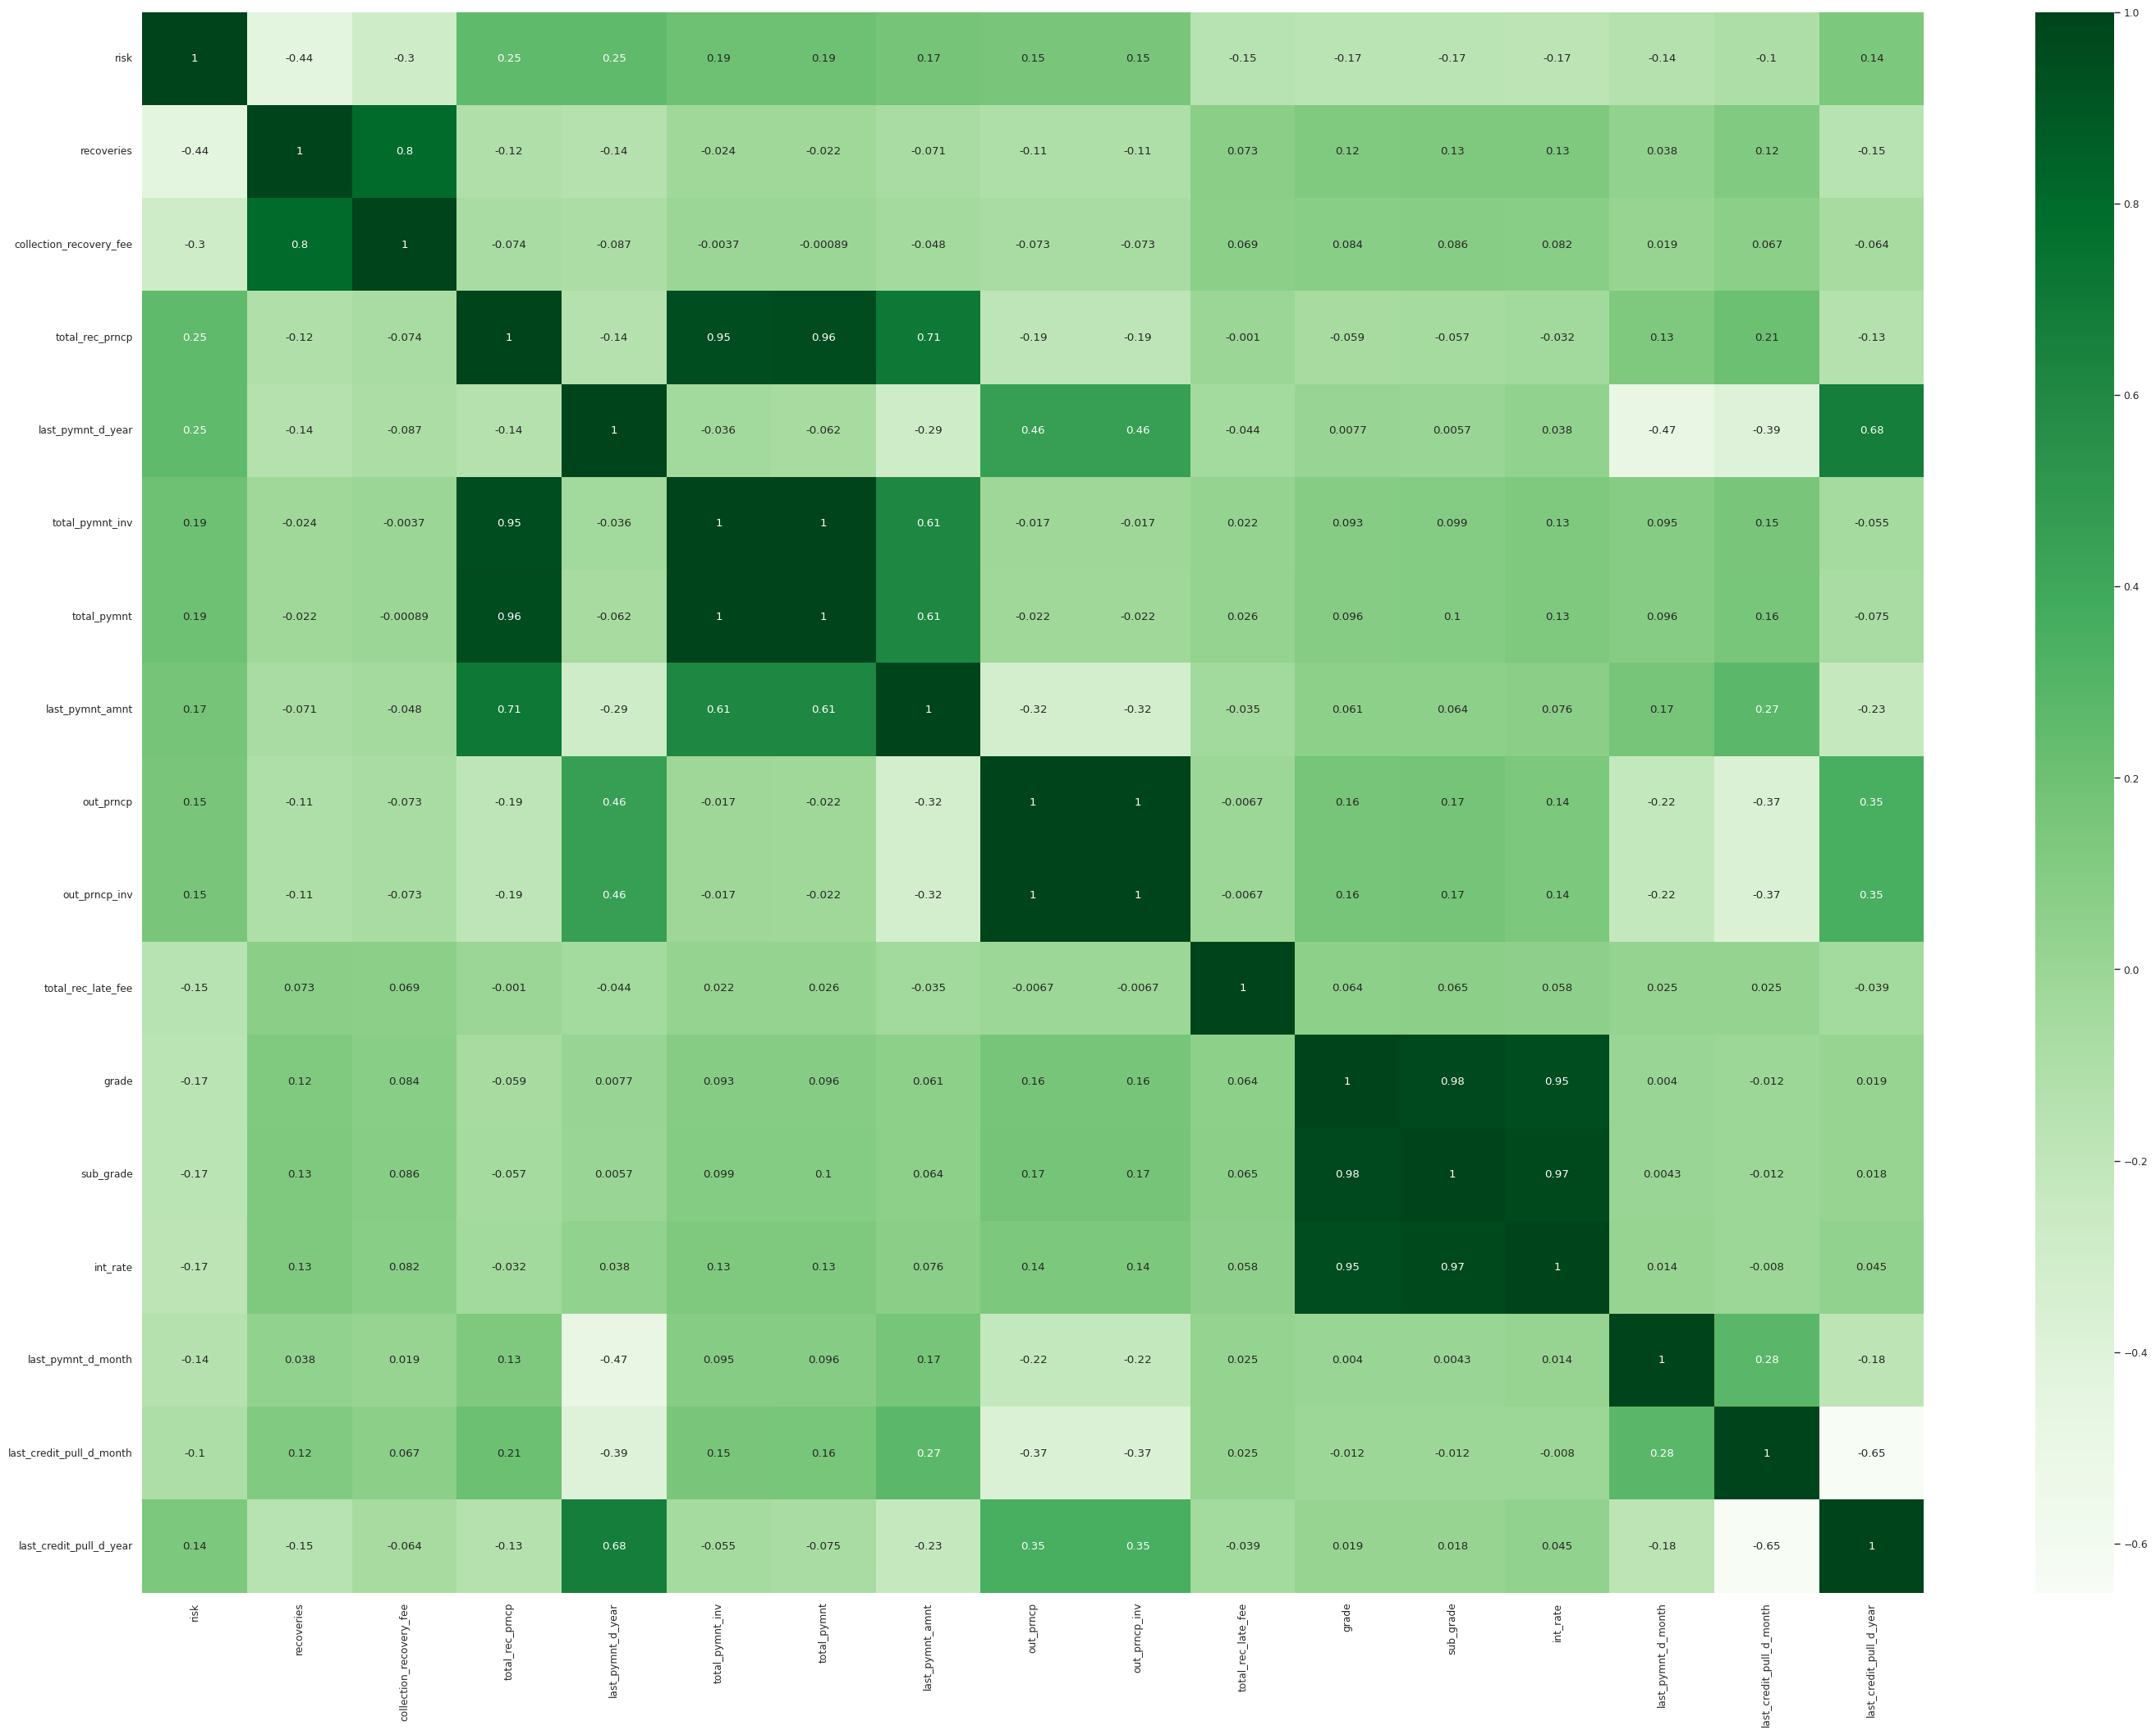

In [ ]:
# let's only include the features mentioned above
fig = plt.figure(figsize = (35,25))
corr_data = concatenated_data[['risk', 'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'last_pymnt_d_year', 
                               'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 
                               'total_rec_late_fee', 'grade', 'sub_grade', 'int_rate', 'last_pymnt_d_month',
                               'last_credit_pull_d_month', 'last_credit_pull_d_year']]
corr = corr_data.corr()

# set threshold for correlation value
corr_threshold = 0.1

# filter out the features that have low correlation value with target feature
low_corr_cols = corr[corr['risk'].abs() < corr_threshold].index
corr_data = corr_data.drop(low_corr_cols, axis=1)

sns.heatmap(corr_data.corr(), cmap='Greens', annot=True);

### Handling Imbalanced Data

In [ ]:
# define X and y
X = corr_data.drop(['risk'], axis=1) #features
y = corr_data['risk'] #target


Due to the highly imbalanced nature of the risk status feature, where 11% of the records are classified as Bad Risk and 88% as Good Risk, resampling is necessary.

**Note:** When working with imbalanced data in machine learning, the resulting model will be biased towards the majority classes. This means that the model may predict the majority classes more often than the minority classes.

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) # good risk
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) # bad risk
  
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_balanced_res, y_balanced_res = sm.fit_resample(X, y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_balanced_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_balanced_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_balanced_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced_res == 0)))

Before OverSampling, counts of label '1': 414099
Before OverSampling, counts of label '0': 52186 

After OverSampling, the shape of train_X: (828198, 16)
After OverSampling, the shape of train_y: (828198,) 

After OverSampling, counts of label '1': 414099
After OverSampling, counts of label '0': 414099


### Data Splitting

I will divide the data into two sets, namely the training set and the testing set, with a ratio of 80:20.

In [ ]:
from sklearn.model_selection import train_test_split

# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(X_balanced_res, y_balanced_res, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(662558, 16) (165640, 16)


### Normalization

Normalization is a crucial preprocessing step since the features in a dataset may have varying ranges of values.

**Note**: It's important to normalize features because when features have different value ranges, they may not contribute equally to the analysis and could create bias in the model.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data to ensure that features with different scales 
# contribute equally to the analysis and prevent numerical instability
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Machine Learning Techniques

Several algorithms will be evaluated to identify the most effective model for predicting credit risk.

1. Decision Tree
2. Random Forest
3. Logistic Regression
4. MLP Classifier (Neural Network)


In [ ]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score
from sklearn.metrics import accuracy_score

#### 1. Decision Tree

In [ ]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


#### Performance of Training Model

Classification Report for Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    331148
           1       1.00      1.00      1.00    331410

    accuracy                           1.00    662558
   macro avg       1.00      1.00      1.00    662558
weighted avg       1.00      1.00      1.00    662558



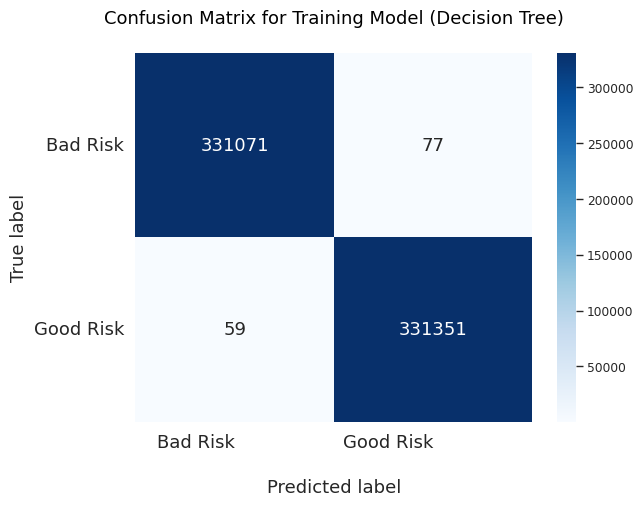

In [ ]:
# Make predictions on the training data using the decision tree model
y_train_pred_dt = dt_model.predict(X_train)

# Print the classification report for the training data
print('Classification Report for Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt))

# Create a confusion matrix as a dataframe
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), 
                                   ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# Plot the confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Decision Tree)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

The accuracy of the training model using the decision tree algorithm is very high based on the results of the classification report.

Based on confusion matrix, it observed that:
1. Out of 662,558 predictions made by the classifier, 662,422 were correct.
2. The classifier predicted bad risk and good risk 331,130 and 331,428 times, respectively. However, the actual sample had 331,148 bad risk and 331,410 good risk.
3. The decision tree model accurately classified both the bad risk and good risk classes, with almost 100% accuracy. Thus, both classes were well classified.

#### Performance of Testing Model

Classification Report Testing Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82951
           1       0.99      0.99      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



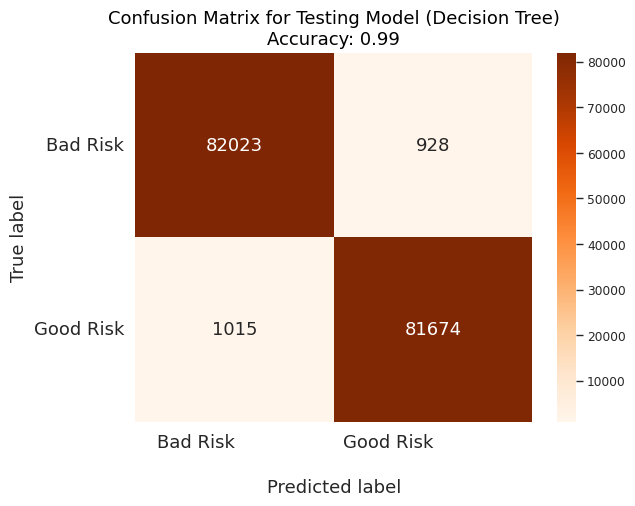

In [ ]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree):')
print(classification_report(y_test, y_test_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_dt)

# plot confusion matrix with accuracy in title
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='Oranges')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Decision Tree)\nAccuracy: {:.2f}'.format(accuracy), fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

The classification report indicates that the testing model of decision tree algorithms has a high accuracy value, suggesting that the model is performing well in predicting credit risk.

Based on confusion matrix, it observed that:
1. Out of a total of 165,640 predictions made by the decision tree model in the testing phase, 162,751 of them were accurate.
2. The model accurately predicted bad risk and good risk 83,768 and 81,872 times respectively, while the actual data had 82,951 bad risk and 82,689 good risk cases.
3. The decision tree model was highly successful in classifying bad and good risks, with both classes having a classification accuracy rate of approximately 99%. However, the bad risk class was slightly better classified than the good risk class.

In [ ]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

Training Accuracy: 99.98 %
Testing Accuracy: 98.83 %


<ipython-input-149-418d24dc4ed9>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


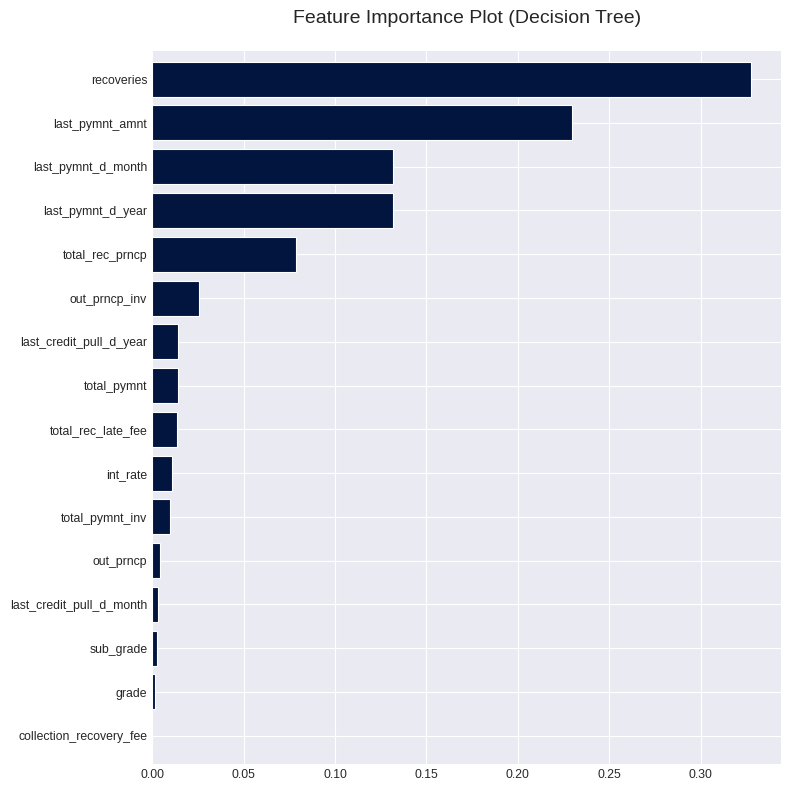

In [ ]:
# visualize important features
importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(8, 8))
importances_dt.plot(kind='barh', color='#01153E', width=0.8, ax=ax)
ax.set_title('Feature Importance Plot (Decision Tree)\n', fontsize=14)
plt.tight_layout()
plt.show()

fig.savefig('top_features_dt.png')


The bar plot displayed indicates that the top five most significant features for predicting credit risk are 
* `recoveries`
* l`ast_pymnt_amnt`
* `last_pymnt_d_year`
* last_pymnt_d_month
* total_rec_prncp



#### 2. Random Forest

In [ ]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


#### Performance of Training Model

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    331148
           1       1.00      1.00      1.00    331410

    accuracy                           1.00    662558
   macro avg       1.00      1.00      1.00    662558
weighted avg       1.00      1.00      1.00    662558



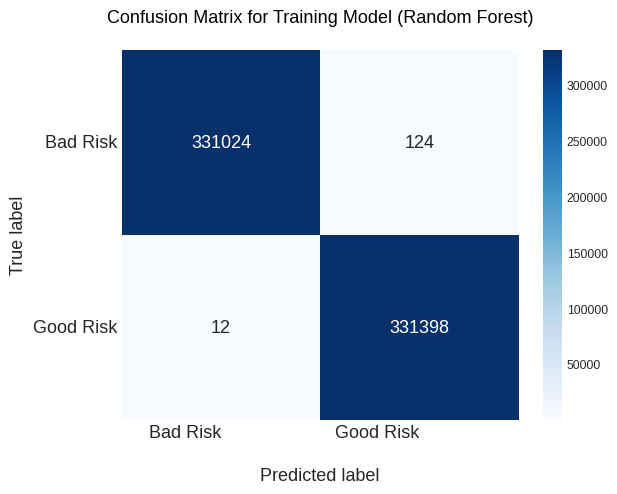

In [ ]:
# predict data train
y_train_pred_rf = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Random Forest)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

The accuracy of the training model for random forest algorithms is very high, as seen from the classification report results.

Based on confusion matrix, it observed that:
1. Out of 662,558 predictions, only 662,421 were accurate in the testing model of random forest algorithms.
2. The model predicted 331,039 bad risks and 331,519 good risks, while the actual sample had 331,148 bad risks and 331,410 good risks.
3. The bad risk and good risk classes were both well-classified, with the random forest model accurately classifying almost all of them.

#### Performance of Testing Model

Classification Report for Random Forest Model (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     82951
           1       0.99      1.00      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



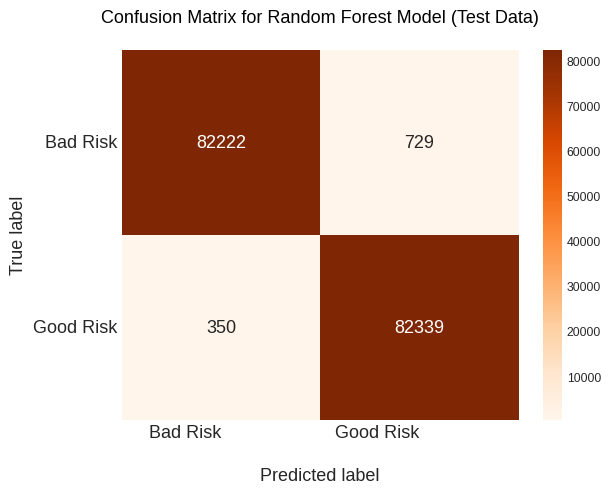

In [ ]:
# predict on test data
y_test_pred_rf = rf_model.predict(X_test)

# print classification report
print('Classification Report for Random Forest Model (Test Data):')
print(classification_report(y_test, y_test_pred_rf))

# form confusion matrix as a DataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='Oranges')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Random Forest Model (Test Data)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()


The results of the classification report indicate that the testing model for the random forest algorithm has a significantly high level of accuracy.

Based on confusion matrix, it observed that:
1. Out of 165,640 predictions made by the classifier, 164,148 of them were accurate.
2. The classifier predicted bad risk 82,679 times and good risk 82,931 times. In the actual sample, there were 82,951 bad risks and 82,689 good risks.
3. The bad risk and good risk classes were the most accurately classified classes by the random forest model, with a 99% accuracy rate.

In [ ]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 99.98 %
Test Accuracy: 99.35 %


<ipython-input-154-942af5080534>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


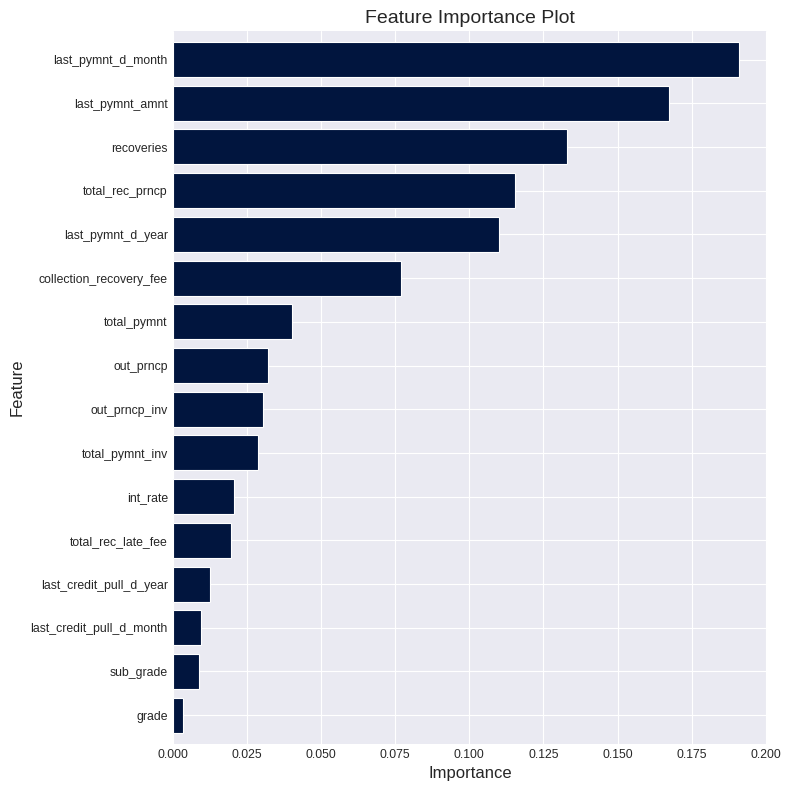

In [ ]:
# Extract feature importances
importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

# Plot feature importances
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(8,8))
importances_rf.plot(kind='barh', color='#01153E', width=0.8, ax=ax)
ax.set_title('Feature Importance Plot', fontsize=14)
ax.set_xlabel('Importance', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Save plot to file
fig.savefig('top_feature.png')

The plot above confirms that the five most important features are

* `last_pymnt_d_month` is month of last payment was received.
* `last_pymnt_amnt` is last total payment amount received.
* `total_rec_prncp` is total principal received to date.
* `recoveries` is post charge off gross recovery.
* `last_pymnt_d_year` is year of last payment was received.

#### 3. Logistic Regression

In [ ]:
# train the model
lr_model = LogisticRegression().fit(X_train, y_train)
print(lr_model)

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Performance of Training Model

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.88      0.88    331148
           1       0.88      0.89      0.88    331410

    accuracy                           0.88    662558
   macro avg       0.88      0.88      0.88    662558
weighted avg       0.88      0.88      0.88    662558



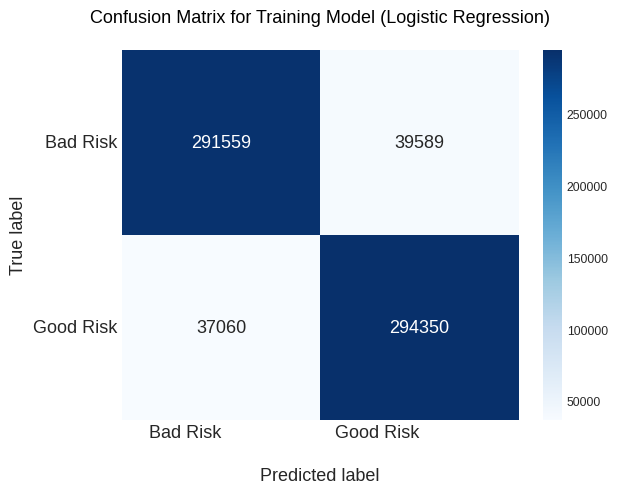

In [ ]:
# predict data train using the logistic regression model
y_train_pred_lr = lr_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_lr))

# form confusion matrix as a DataFrame
confusion_matrix_lr = pd.DataFrame((confusion_matrix(y_train, y_train_pred_lr)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix using seaborn heatmap
plt.figure()
heatmap = sns.heatmap(confusion_matrix_lr, annot=True, annot_kws={'size': 13}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

# set plot title, labels, and show the plot
plt.title('Confusion Matrix for Training Model (Logistic Regression)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

The classification report shows that the logistic regression training model has a relatively high accuracy value.

Based on confusion matrix, it observed that:
1. The classifier made a total of 662,558 predictions, but only 585,599 of them were accurate.
2. The classifier predicted 327,815 bad risk instances and 334,743 good risk instances, while the actual sample had 331,148 bad risk and 331,410 good risk instances.
3. Both bad and good risk classes were well-classified, but the model performed slightly better on the good risk class, with 89% accuracy.

#### Performance of Testing Model

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     82951
           1       0.88      0.89      0.89     82689

    accuracy                           0.89    165640
   macro avg       0.89      0.89      0.89    165640
weighted avg       0.89      0.89      0.89    165640



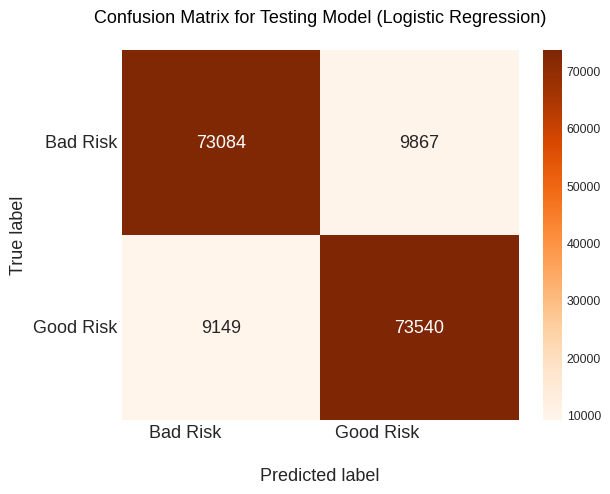

In [ ]:
# Predict target variable using the logistic regression model on test data
y_test_pred_lr = lr_model.predict(X_test)

# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_lr))

# Form confusion matrix as a DataFrame
confusion_matrix_lr = pd.DataFrame((confusion_matrix(y_test, y_test_pred_lr)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_lr, annot=True, annot_kws={'size': 13}, fmt='d', cmap='Oranges')

# Set tick label properties
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

# Add title and axis labels
plt.title('Confusion Matrix for Testing Model (Logistic Regression)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)

# Display the plot
plt.show()

The classification report shows that the logistic regression testing model has achieved a high level of accuracy.

Based on confusion matrix, it observed that:
1. Out of a total of 165,640 predictions made by the classifier, only 146,444 were accurate.
2. The classifier identified 83,009 instances as bad risk and 82,731 instances as good risk. However, in the actual sample, there were 82,951 instances of bad risk and 82,689 instances of good risk.
3. The logistic regression model was most effective in accurately classifying the bad risk and good risk classes. It correctly classified 88% of these instances.

In [ ]:
acc_lr_train=round(lr_model.score(X_train,y_train)*100,2)
acc_lr_test=round(lr_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_lr_train))
print("Test Accuracy: {} %".format(acc_lr_test))

Training Accuracy: 88.43 %
Test Accuracy: 88.52 %


#### 4. MLP Classifier (Neural Network)

In [ ]:
# train the model
mlp_model = MLPClassifier().fit(X_train, y_train)

#### Performance of Training Model

Classification Report for Training Model (MLP Classifier):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    331148
           1       0.98      1.00      0.99    331410

    accuracy                           0.99    662558
   macro avg       0.99      0.99      0.99    662558
weighted avg       0.99      0.99      0.99    662558



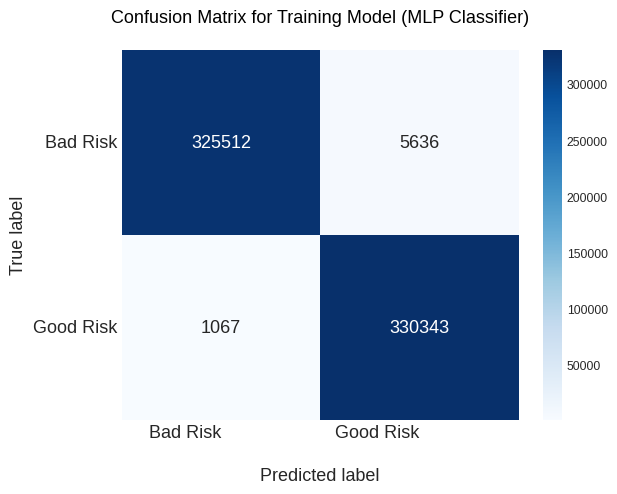

In [ ]:
# Predict on the training set
y_train_pred_mlp = mlp_model.predict(X_train)

# Print the classification report
print('Classification Report for Training Model (MLP Classifier):')
print(classification_report(y_train, y_train_pred_mlp))

# Form the confusion matrix as a DataFrame
confusion_matrix_mlp = pd.DataFrame((confusion_matrix(y_train, y_train_pred_mlp)), 
                                    ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# Plot the confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_mlp, annot=True, annot_kws={'size': 13}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (MLP Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

According to the classification report, the training model using neural network algorithms has a medium accuracy value.

Based on confusion matrix, it observed that:
1. Out of the 662,558 predictions made by the classifier, 655,285 of them were correct.
2. The classifier predicted 325,395 bad risk and 337,163 good risk, while the actual sample had 331,148 bad risk and 331,410 good risk.
3. The neural network model performed exceptionally well in classifying the good risk class, with almost 100% accuracy.
4. The model had more incorrect predictions in classifying bad risk as good risk.






#### Performance of Testing Model

Classification Report Testing Model (MLP Classifier):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     82951
           1       0.98      1.00      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



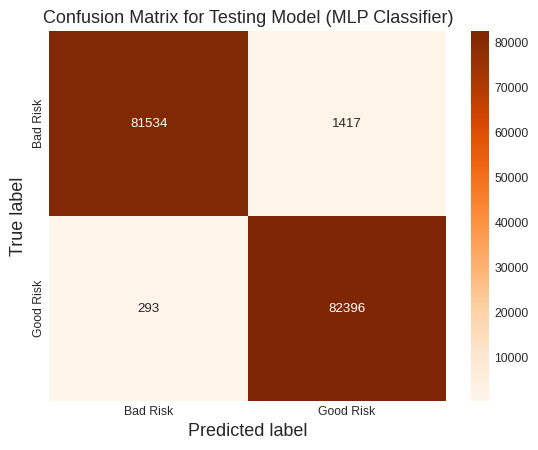

In [ ]:
# predict data test
y_test_pred = mlp_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (MLP Classifier):\n', classification_report(y_test, y_test_pred))

# plot confusion matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=['Bad Risk', 'Good Risk'], columns=['Bad Risk', 'Good Risk'])
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix for Testing Model (MLP Classifier)', fontsize=13)
plt.xlabel('Predicted label', fontsize=13)
plt.ylabel('True label', fontsize=13)
plt.show()

According to the classification report, the testing model using neural network algorithms has an average level of accuracy.

Based on confusion matrix, it observed that:
1. Out of 165,640 predictions made by the classifier, only 163,955 were accurate.
2. The classifier predicted bad risk 81,914 times and good risk 83,729 times, while the sample actually had 82,951 bad risk and 82,689 good risk.
3. The good risk category had the best classification accuracy, with the neural network model correctly classifying almost all of them.
4. The majority of the errors were caused by the classifier wrongly predicting bad risk as good risk.

In [ ]:
acc_mlp_train=round(mlp_model.score(X_train,y_train)*100,2)
acc_mlp_test=round(mlp_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_mlp_train))
print("Test Accuracy: {} %".format(acc_mlp_test))

Training Accuracy: 98.99 %
Test Accuracy: 98.97 %


### Model Comparison

The models will be assessed and compared based on their accuracy values, which represent the proportion of correct predictions to the total number of input samples. The goal is to achieve a high accuracy or a high number of correct predictions. Below are the accuracy values for each model.

In [ ]:
results = pd.DataFrame([["Decision Tree", acc_dt_train, acc_dt_test],["Random Forest", acc_rf_train, acc_rf_test], 
                        ["Logistic Regression", acc_lr_train, acc_lr_test], ["MLP Classifier", acc_mlp_train, acc_mlp_test]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='PuRd')

,Models,Training Accuracy Score,Testing Accuracy Score
1,Random Forest,99.980000,99.350000
0,Decision Tree,99.980000,98.830000
3,MLP Classifier,98.990000,98.970000
2,Logistic Regression,88.430000,88.520000


## Conclusion

1. The conclusion is that the random forest algorithm is the most effective model for forecasting the loan risk status of applicants. The random forest model has a smaller difference in accuracy between the training and testing sets compared to the decision tree models, despite having similar high accuracy values in the training set.
2. To reduce the risk of loss, the company should keep an eye on certain indicators, such as the last payment month, last payment amount, total principal received, recovery value, and last payment year. These factors were identified as the most crucial in predicting whether an applicant is likely to default on their loan.
 * If applicants in the future exhibit those indicators, the company can take measures such as declining their loan application, decreasing the loan amount, or lending at a higher interest rate to mitigate and decrease the overall loss incurred by the company.